In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error


Mean Squared Error (MSE): 8011.289156822536
R-squared (R²): 0.9291378157335358


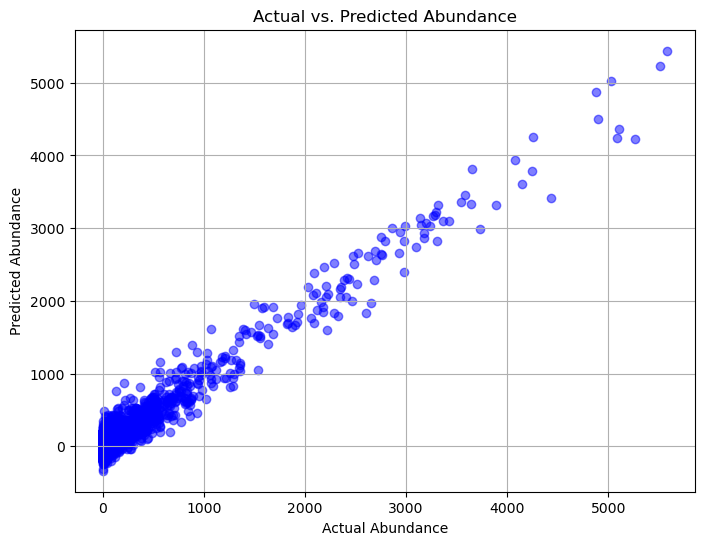

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load the data
def load_data(file_path):
    data = pd.read_excel(file_path)
    return data

# Detecting outliers using Z-scores
def detect_outliers_zscore(data, columns, threshold=3):
    outliers = {}
    for col in columns:
        z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())
        outliers[col] = z_scores > threshold
    return outliers

# Detecting outliers using IQR
def detect_outliers_iqr(data, columns, threshold=1.5):
    outliers = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers[col] = (data[col] < (Q1 - threshold * IQR)) | (data[col] > (Q3 + threshold * IQR))
    return outliers

# Preprocess the data
def preprocess_data(data):
    # Handle missing values
    data['Nc'] = data['Nc'].replace('*****', '0').astype('float')

    # Min-Max scaling
    scaler = MinMaxScaler()
    data[['ENC', "ENC' | all (bg)", 'Gravy', 'L_aa', 'L_sym']] = scaler.fit_transform(data[['ENC', "ENC' | all (bg)", 'Gravy', 'L_aa', 'L_sym']])

    # Drop unnecessary columns
    data = data.drop(columns=['string_external_id', 'Uniprot_ID', 'CBI'], axis=1)

    return data


# Train the model with polynomial features
def train_model(X, y):
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    return model

if __name__ == "__main__":
    file_path = r"C:\Users\shraj\OneDrive\Desktop\freelance-20231007T095553Z-001\freelance\eleg_Final_complied.xls"
    data = load_data(file_path)
    data = preprocess_data(data)

    X = data.drop('abundance', axis=1)
    y = data['abundance']

    model = train_model(X, y)

    # Transform the entire dataset with polynomial features
    X_poly = PolynomialFeatures(degree=2).fit_transform(X)

    # Predict on the entire dataset
    y_pred = model.predict(X_poly)

    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R²):", r_squared)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y, y_pred, color='blue', alpha=0.5)
    plt.xlabel('Actual Abundance')
    plt.ylabel('Predicted Abundance')
    plt.title('Actual vs. Predicted Abundance')
    plt.grid(True)
    
    plt.savefig('prediction_scatter_plot.png')  
    plt.show() 

# Correlation Heatmap

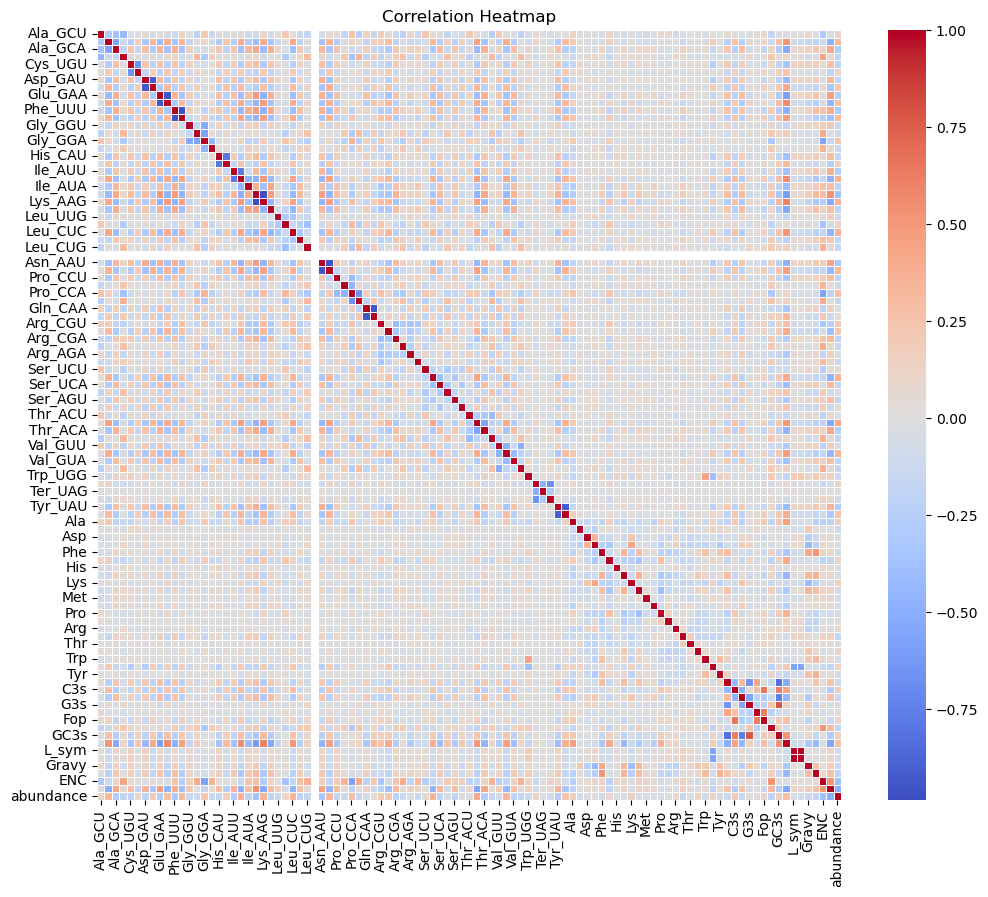

In [3]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False, linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Residual Plot

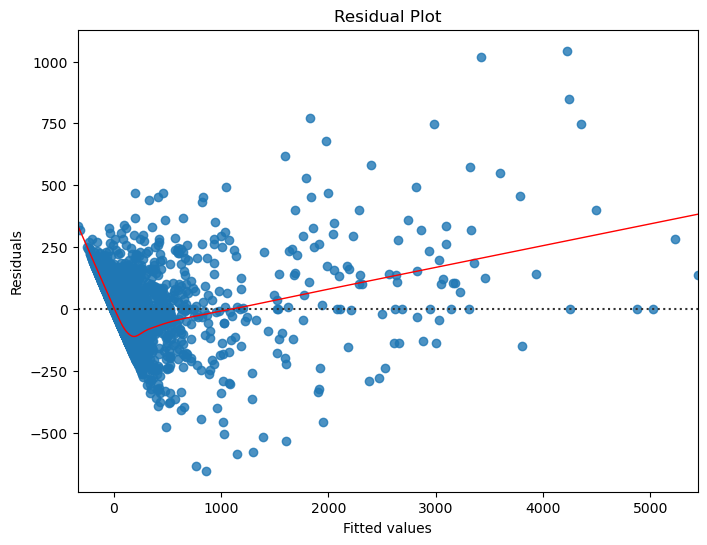

In [5]:
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=y - y_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


# Abundance distribution

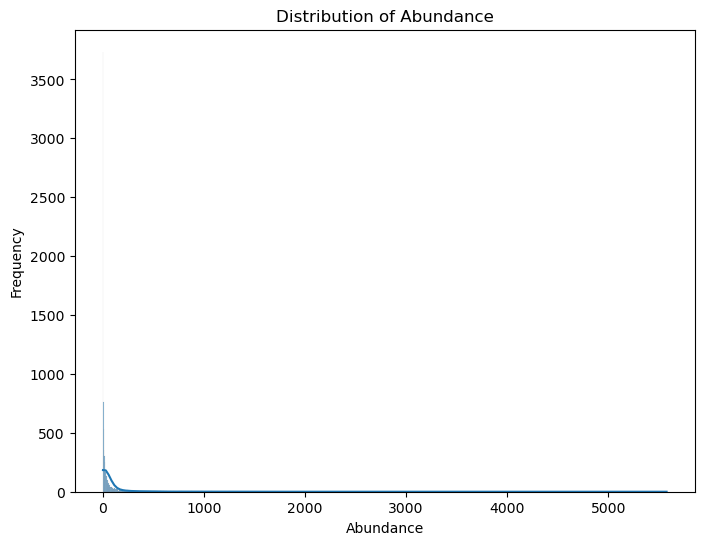

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True)
plt.xlabel('Abundance')
plt.ylabel('Frequency')
plt.title('Distribution of Abundance')
plt.show()


# Regression Plot

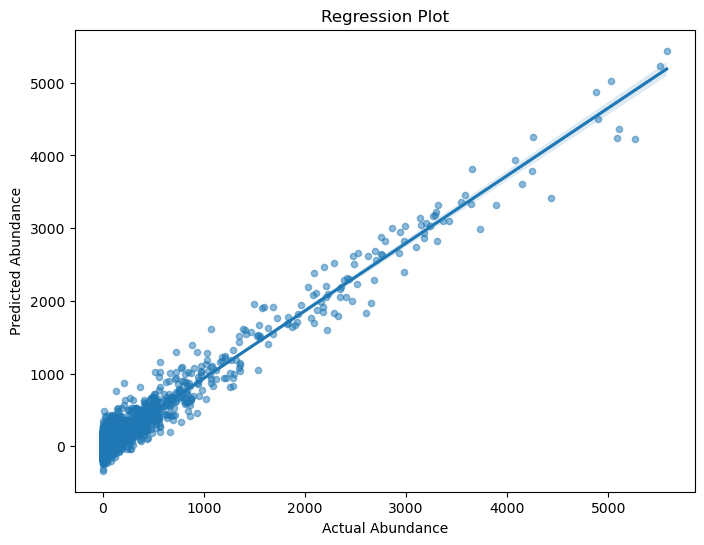

In [7]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y, y=y_pred, scatter_kws={'s': 20, 'alpha': 0.5})
plt.xlabel('Actual Abundance')
plt.ylabel('Predicted Abundance')
plt.title('Regression Plot')
plt.show()


# Residual Distribuition

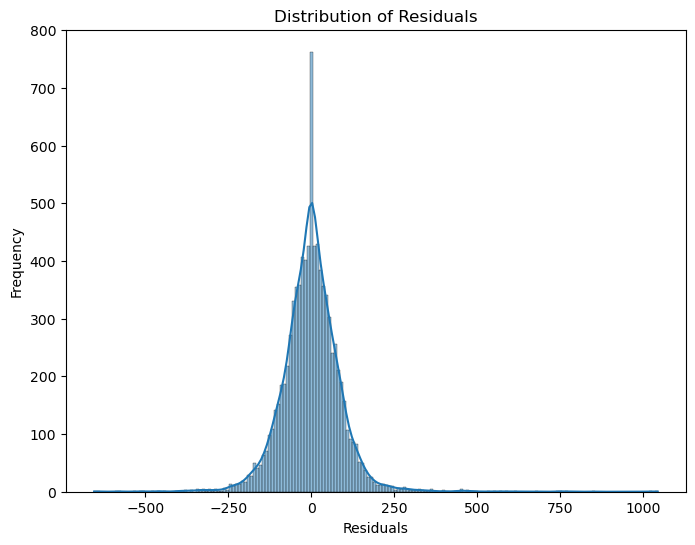

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(y - y_pred, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


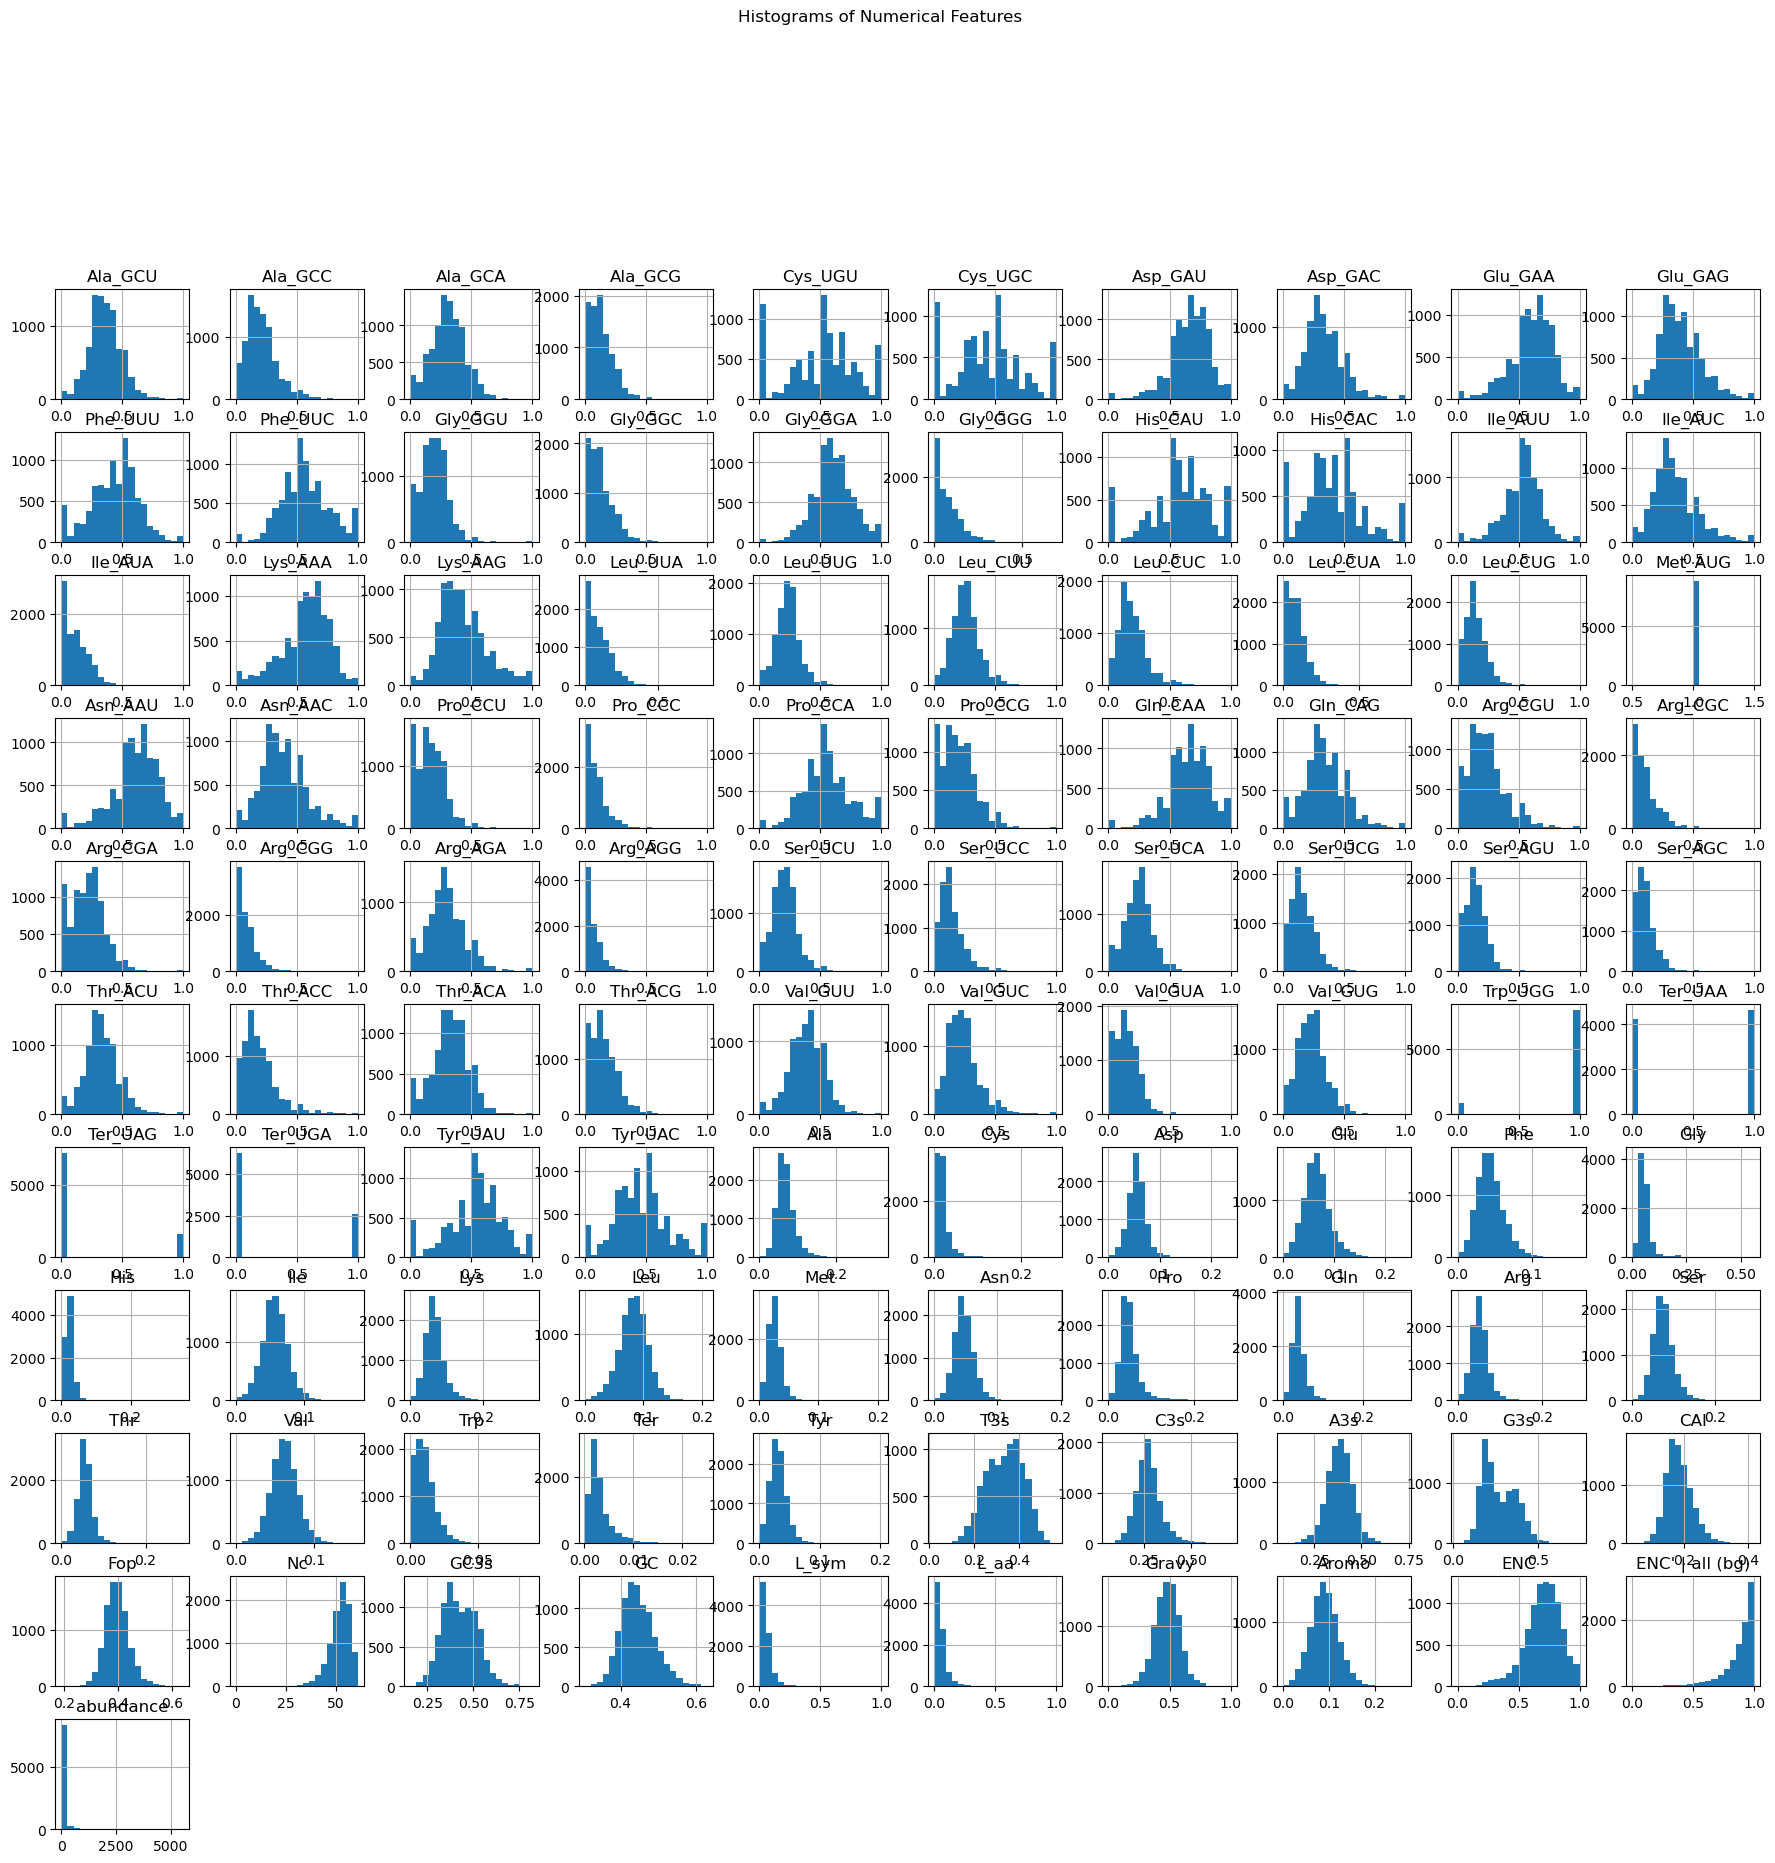

In [14]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.hist(bins=20, figsize=(22, 20))
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.show()


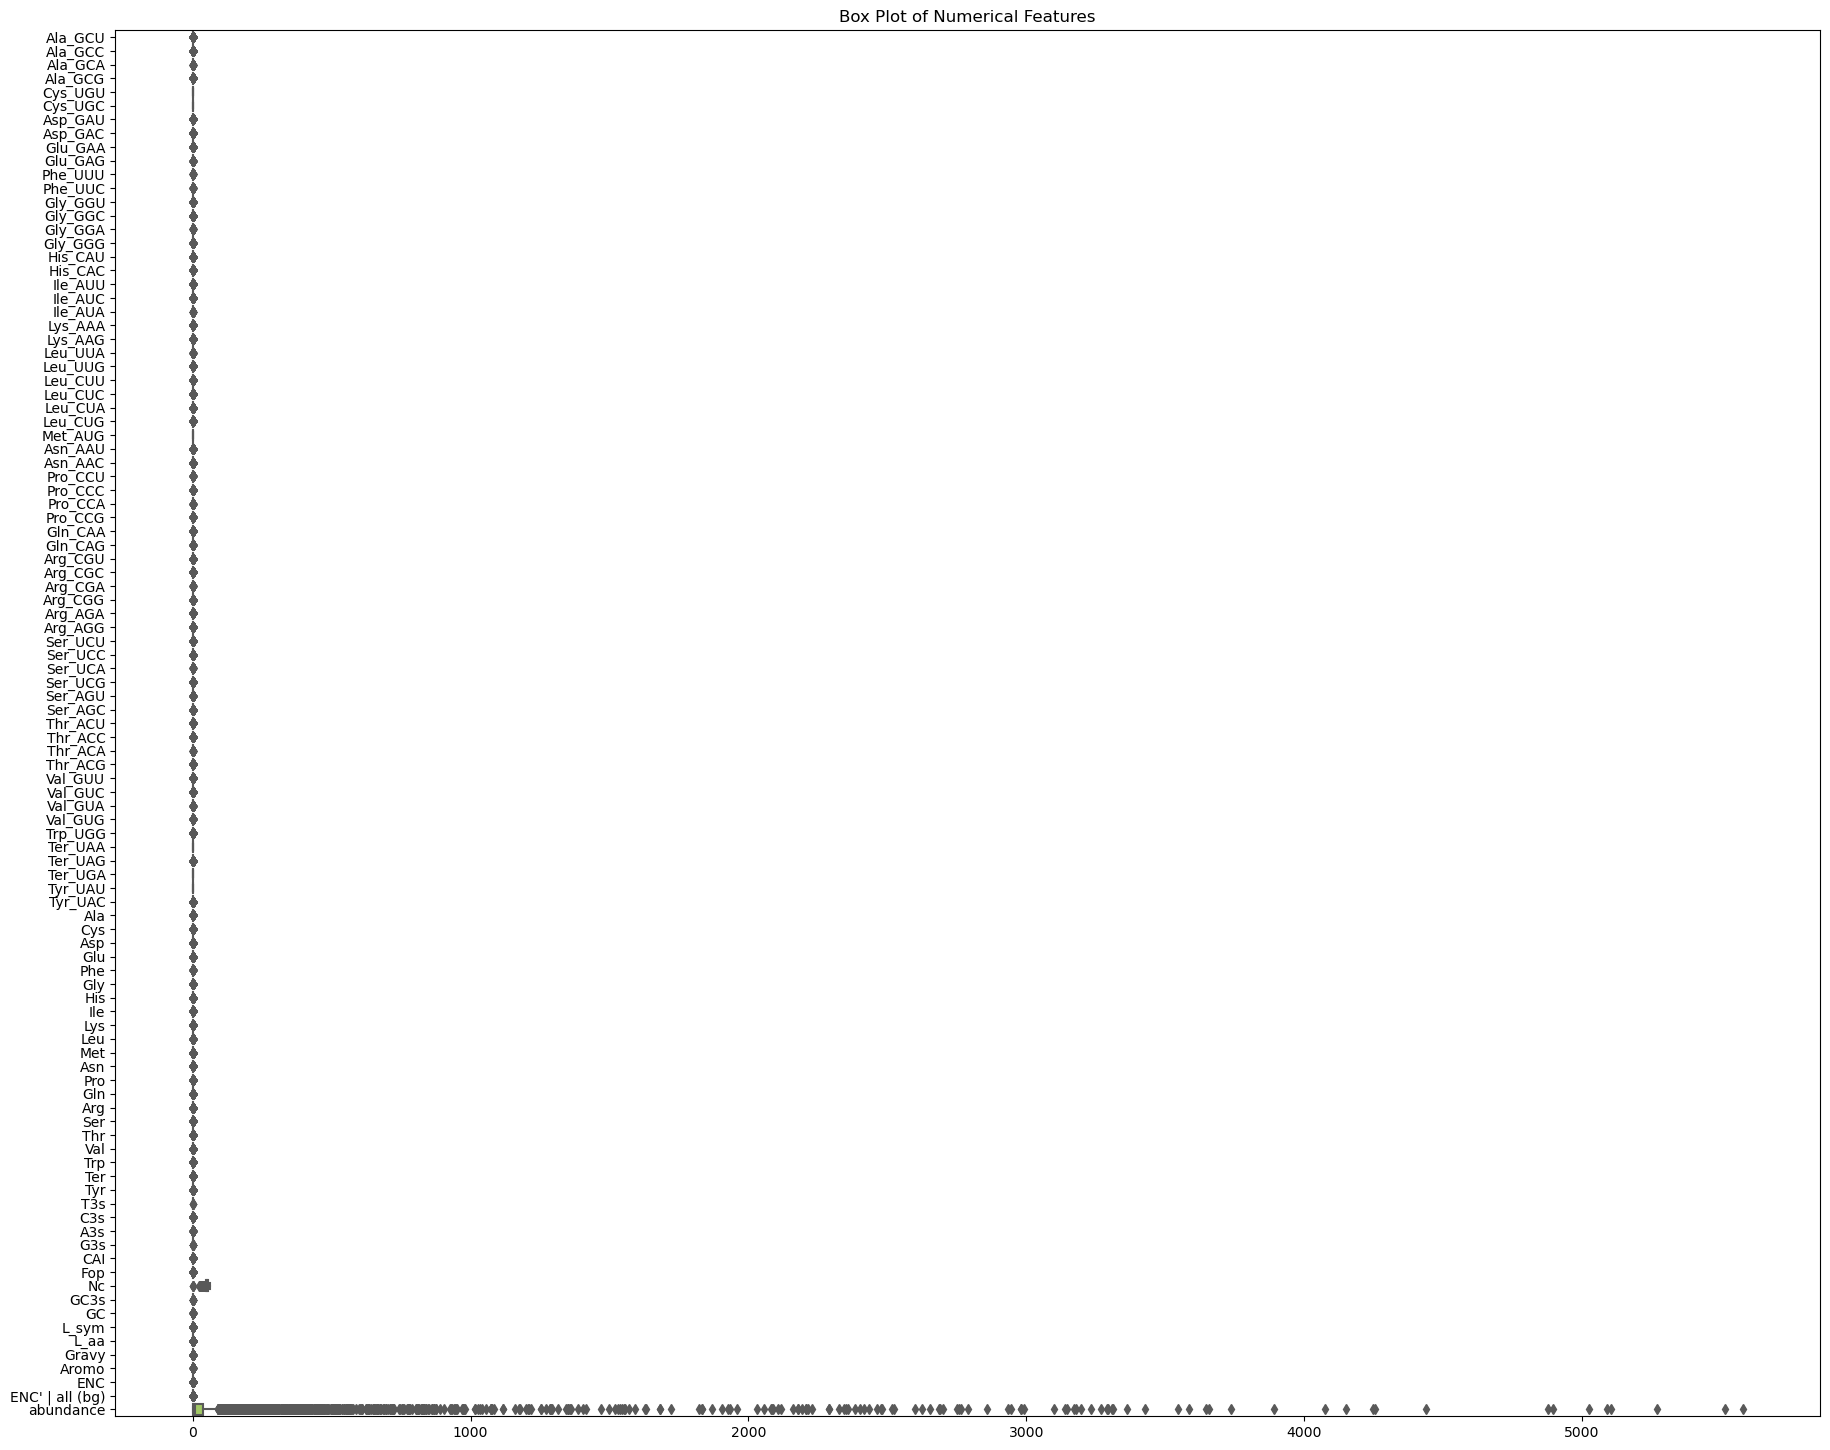

In [16]:
plt.figure(figsize=(22, 18))
sns.boxplot(data=numerical_features, orient="h", palette="Set2")
plt.title("Box Plot of Numerical Features")
plt.show()


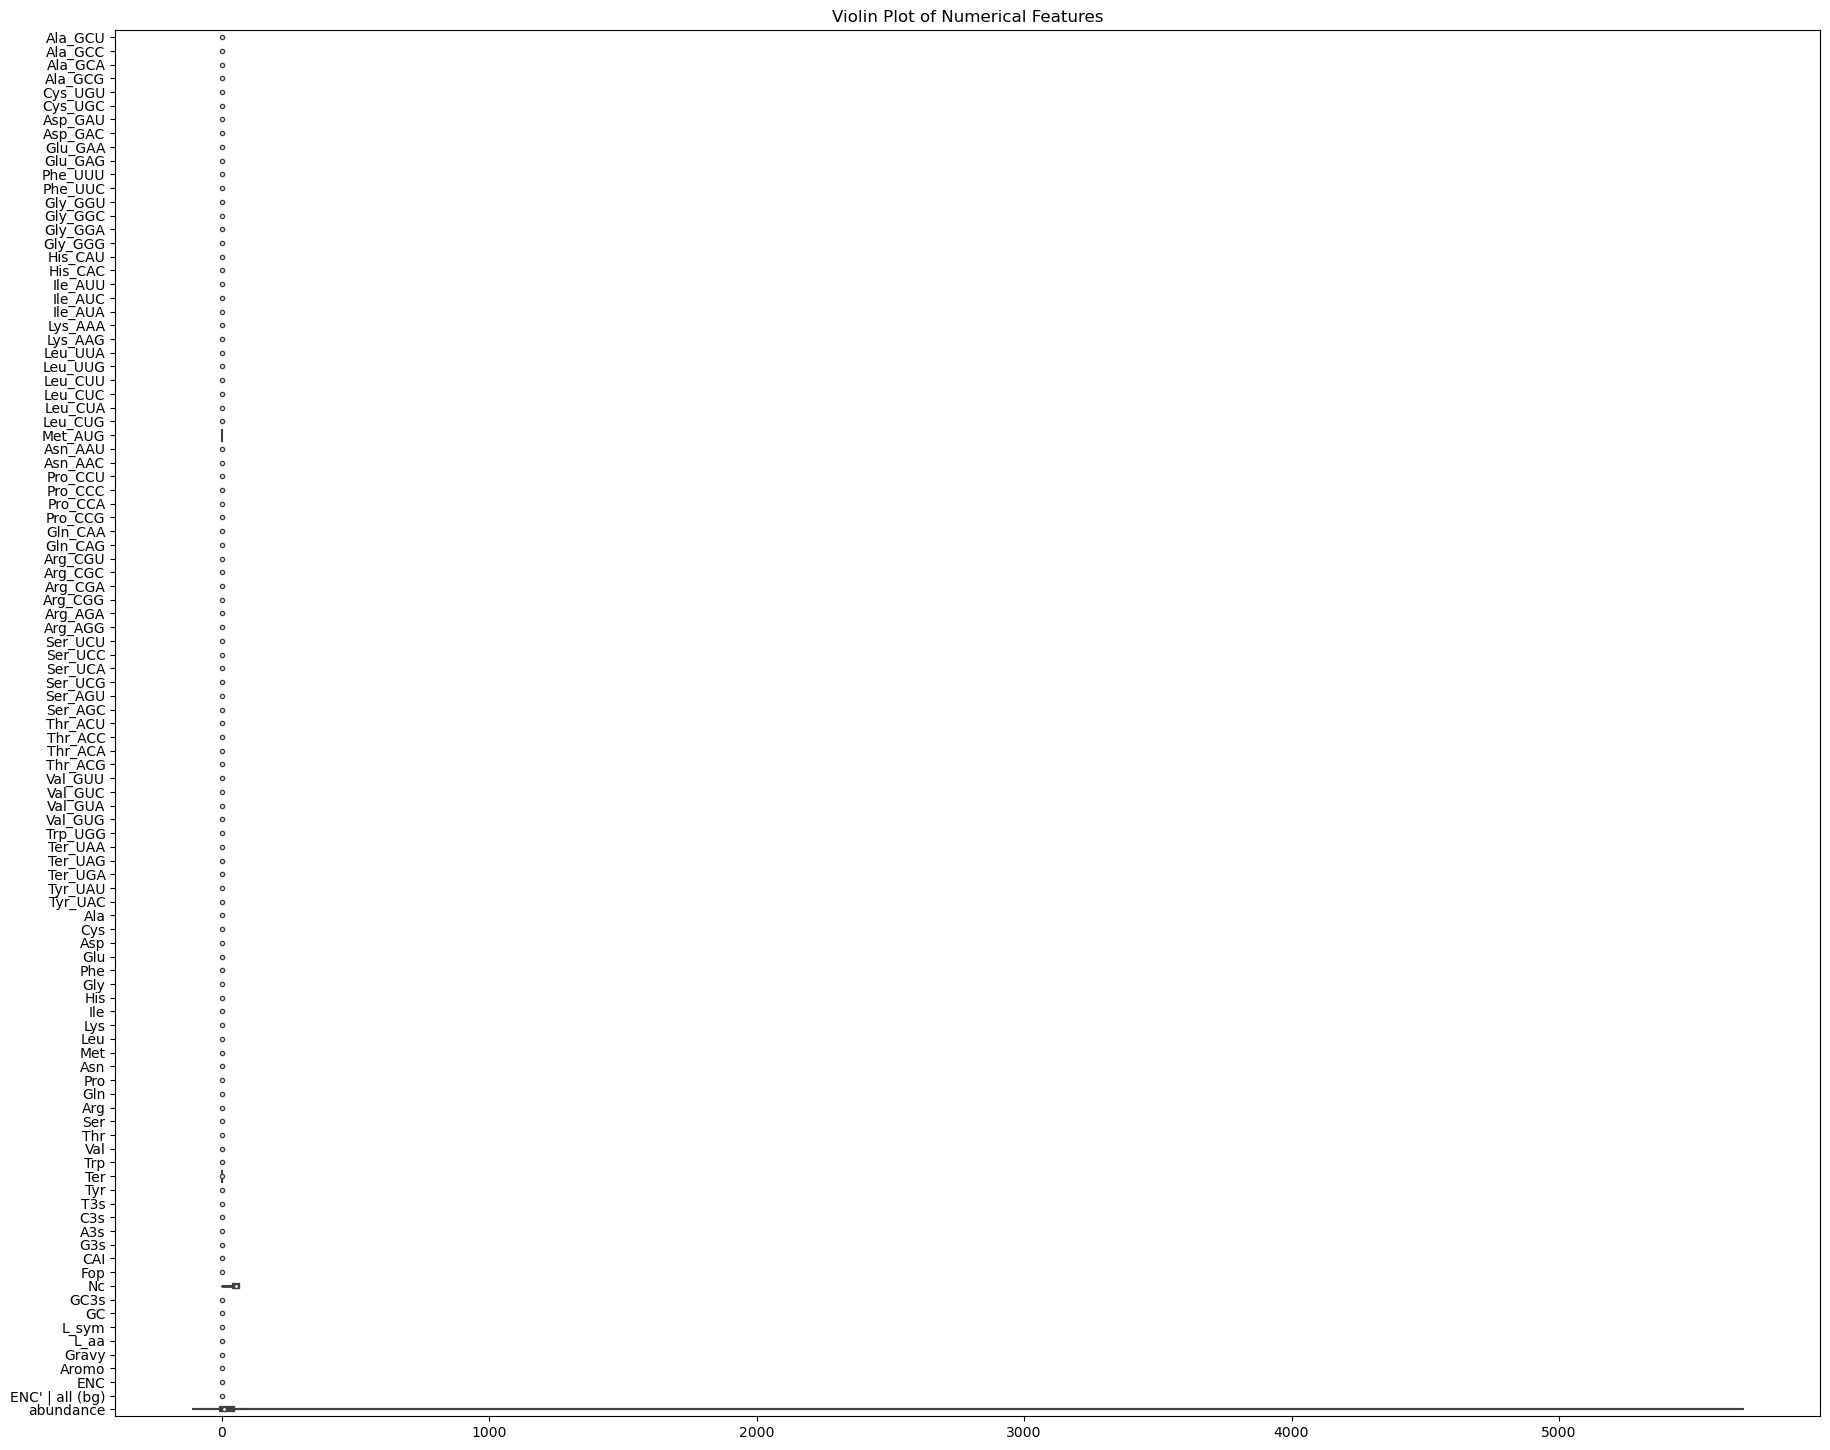

In [19]:
plt.figure(figsize=(22, 18))
sns.violinplot(data=numerical_features, orient="h", palette="husl")
plt.title("Violin Plot of Numerical Features")
plt.show()


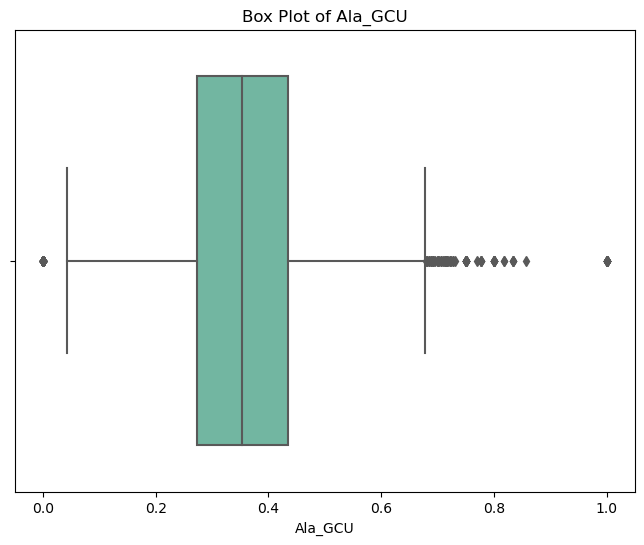

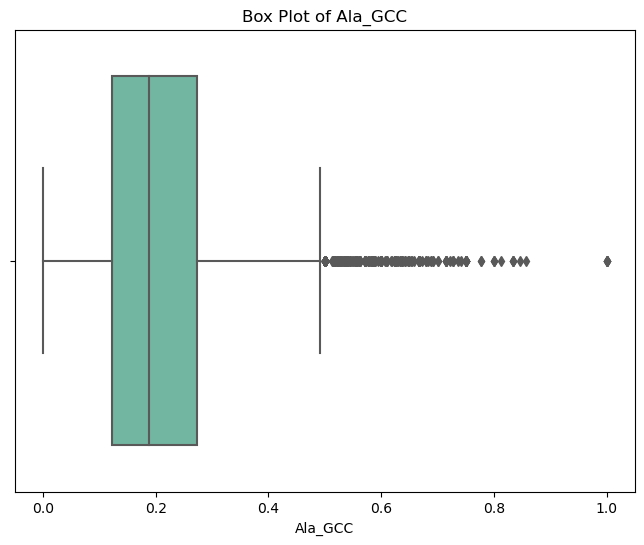

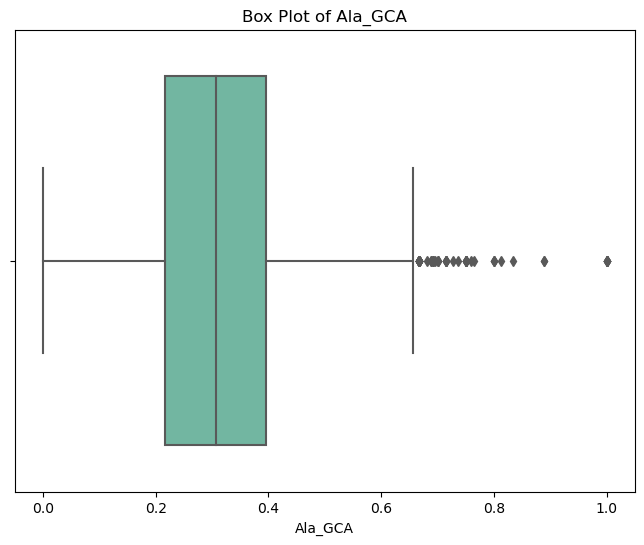

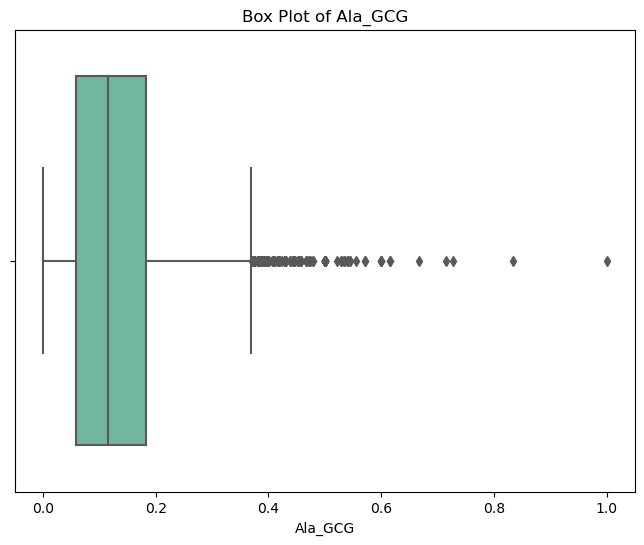

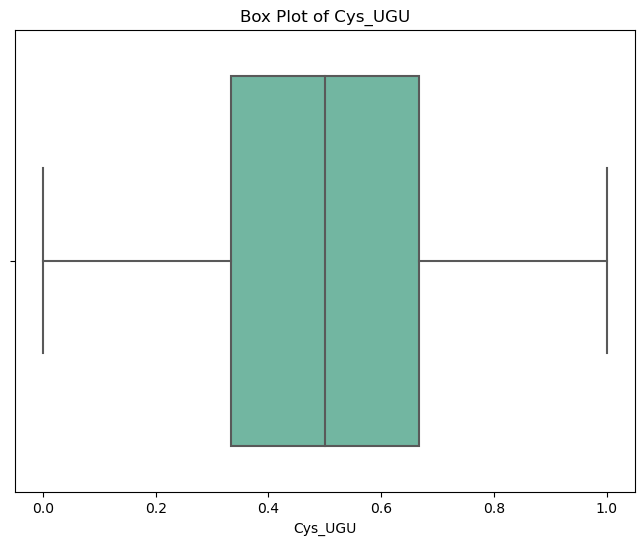

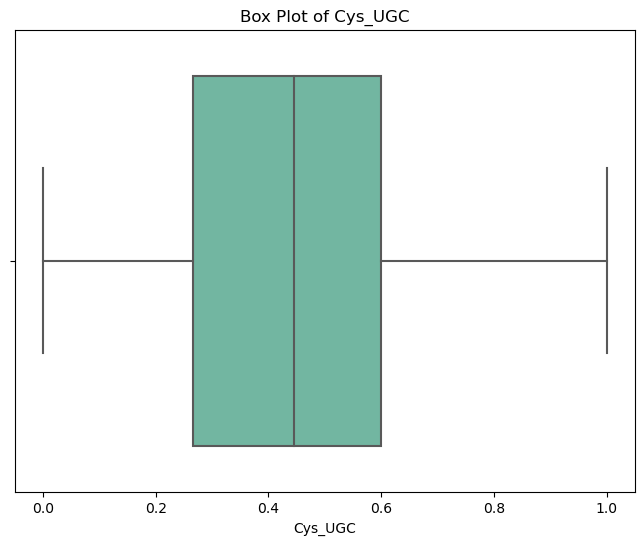

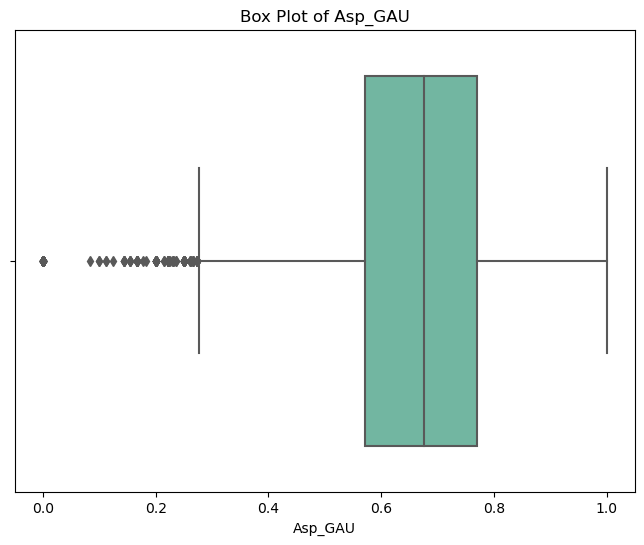

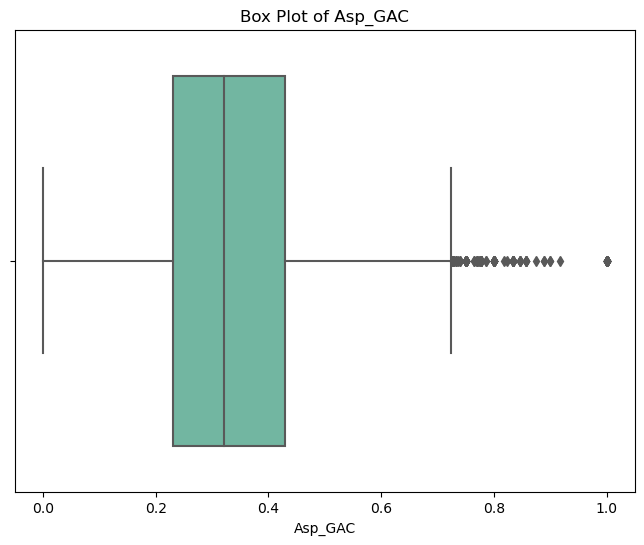

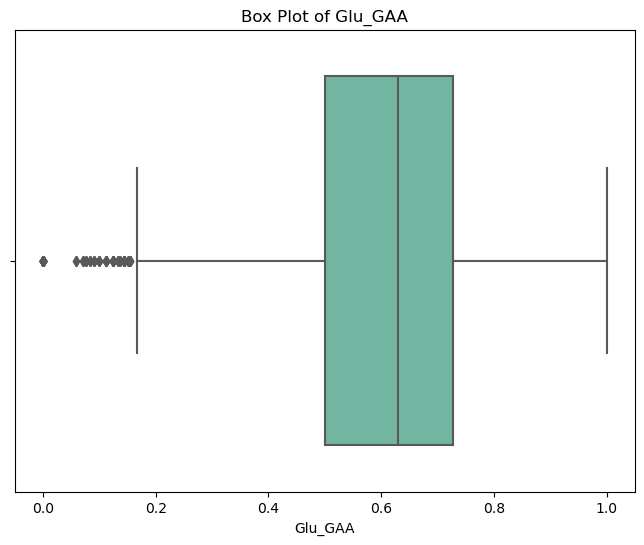

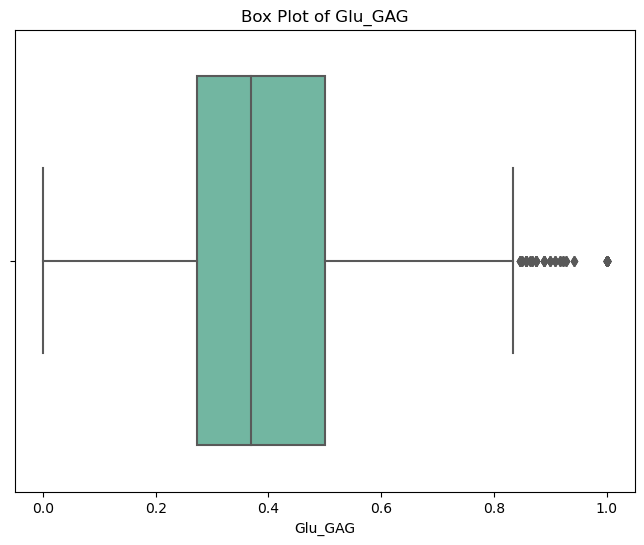

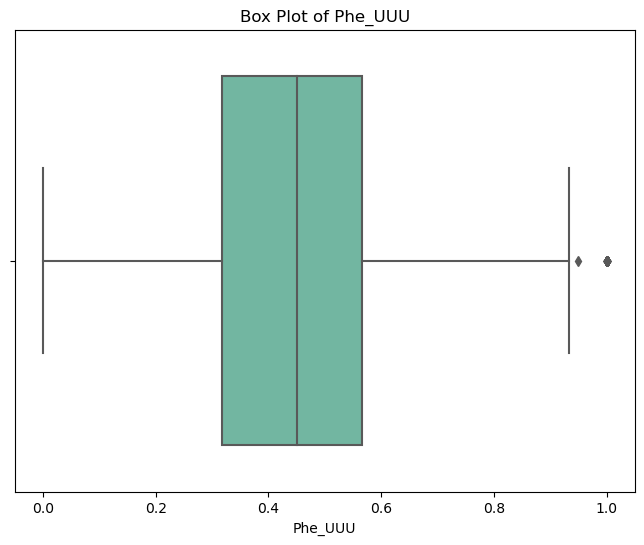

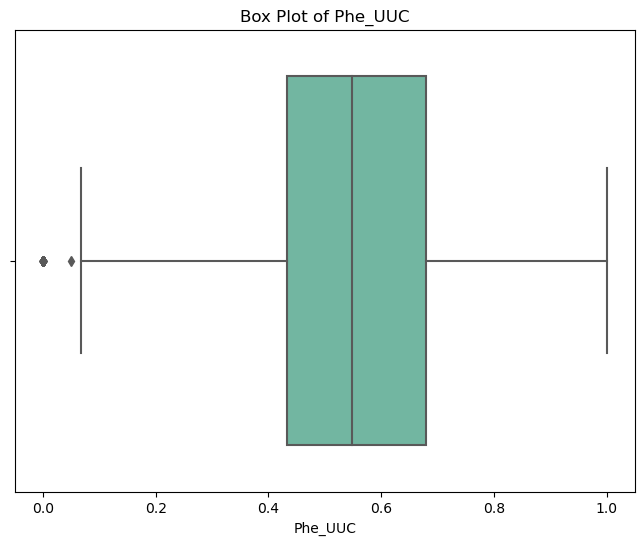

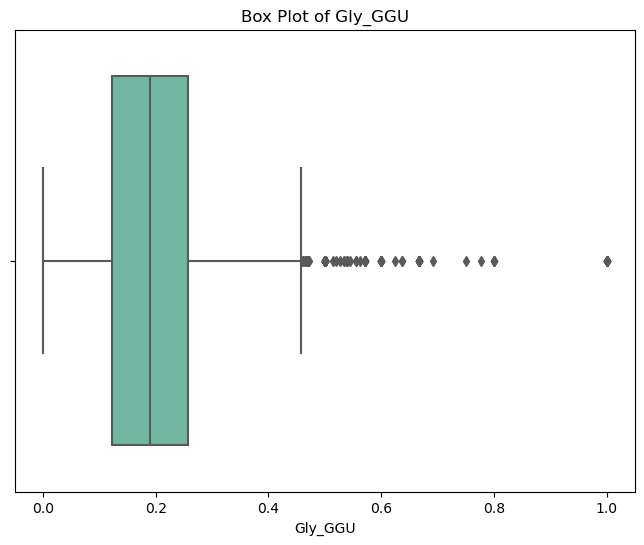

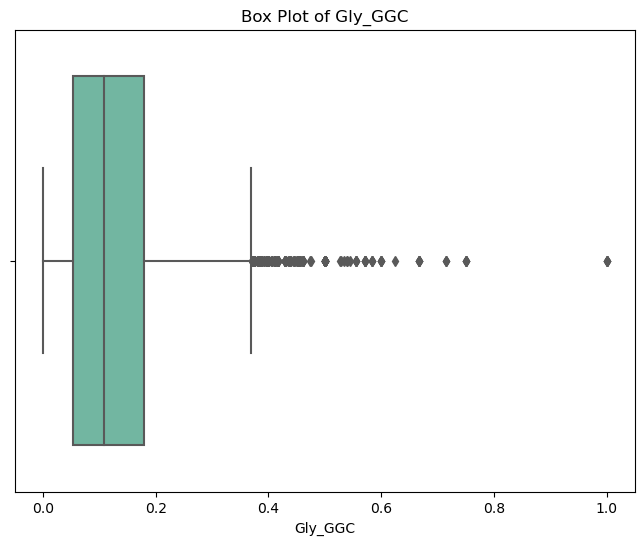

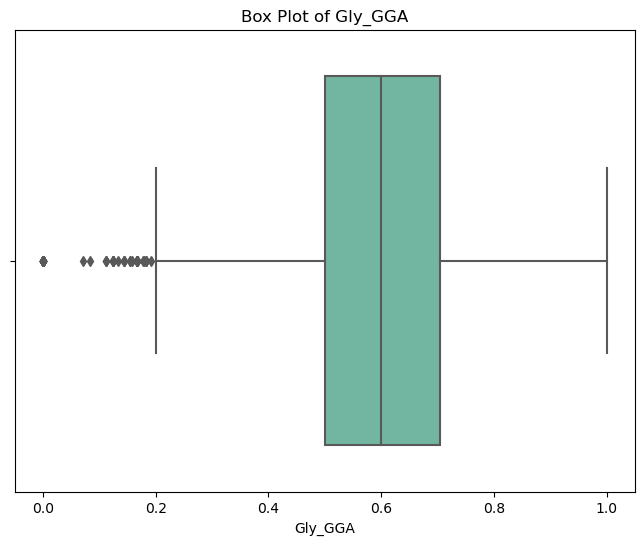

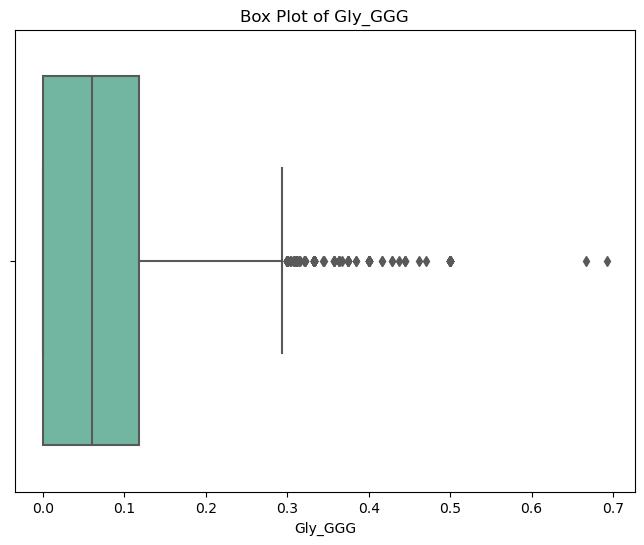

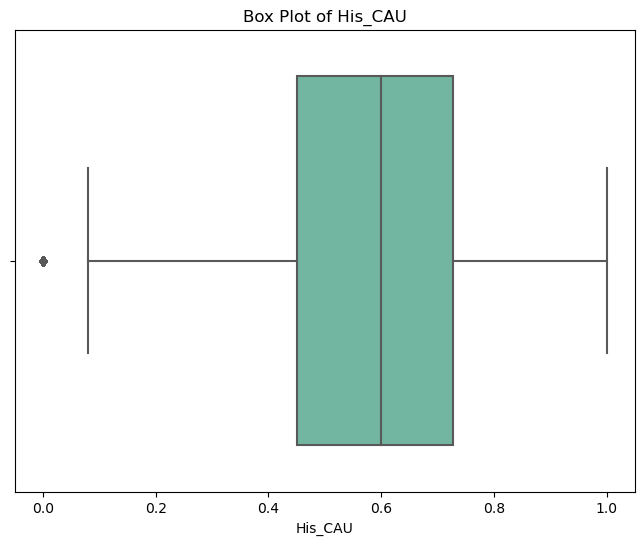

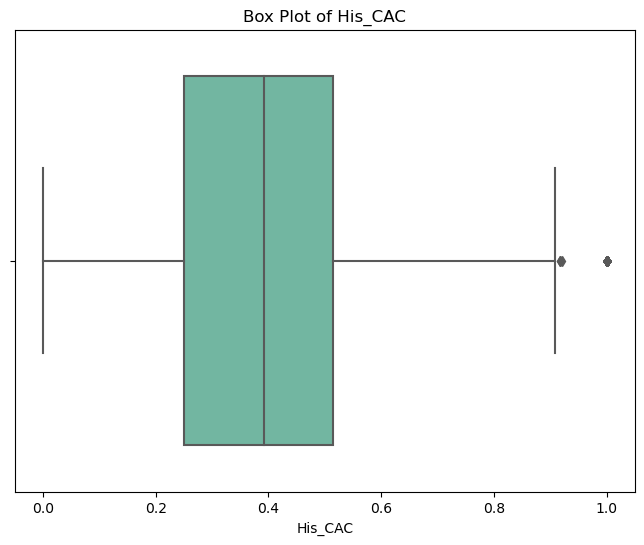

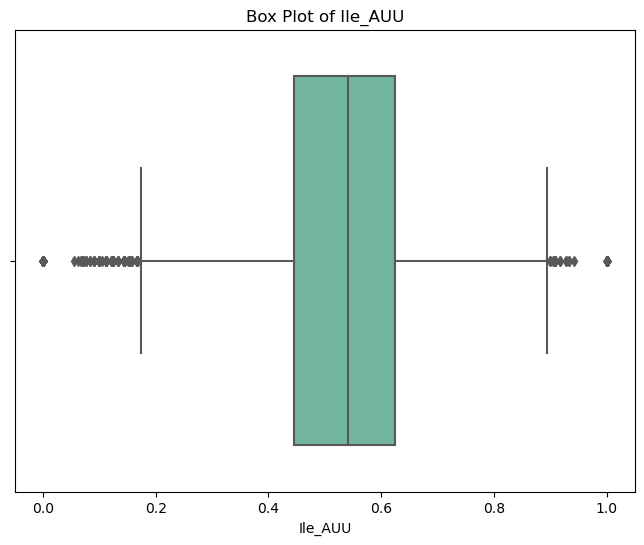

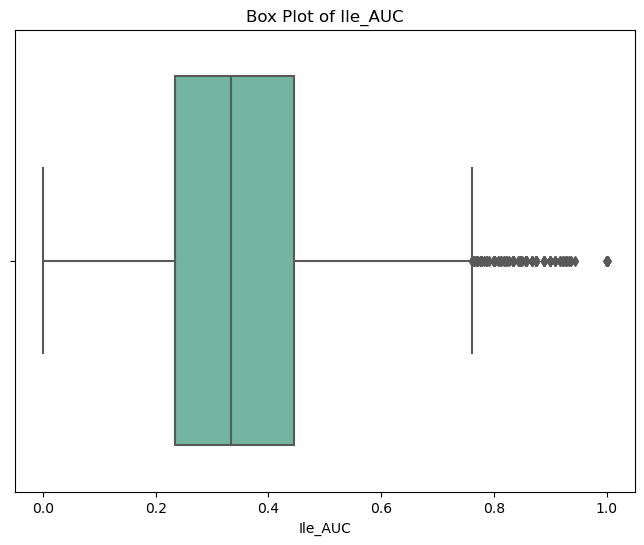

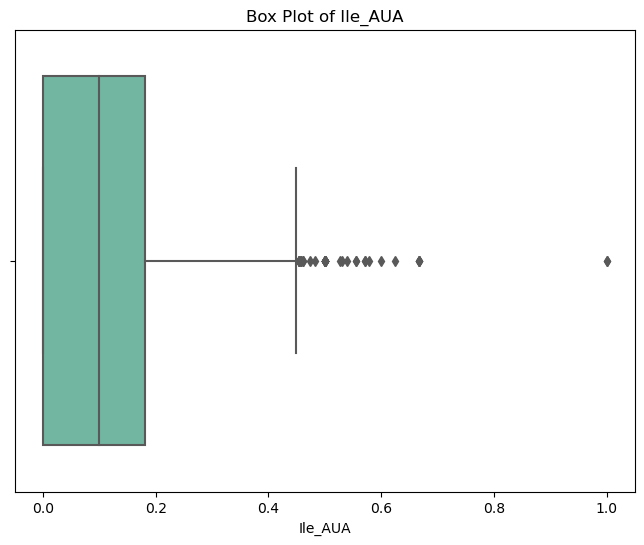

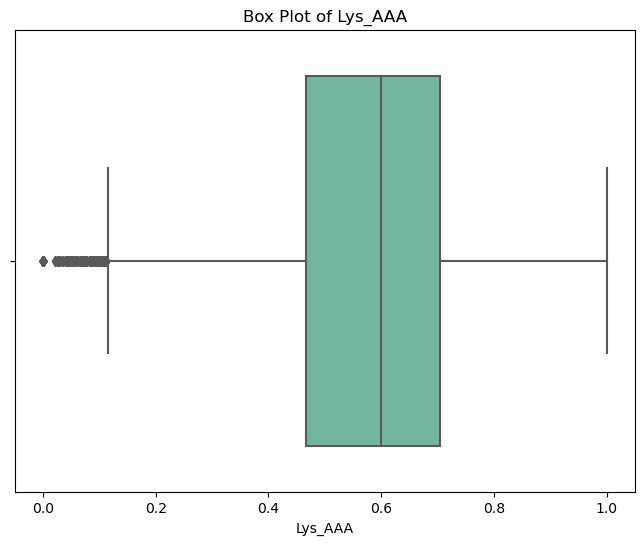

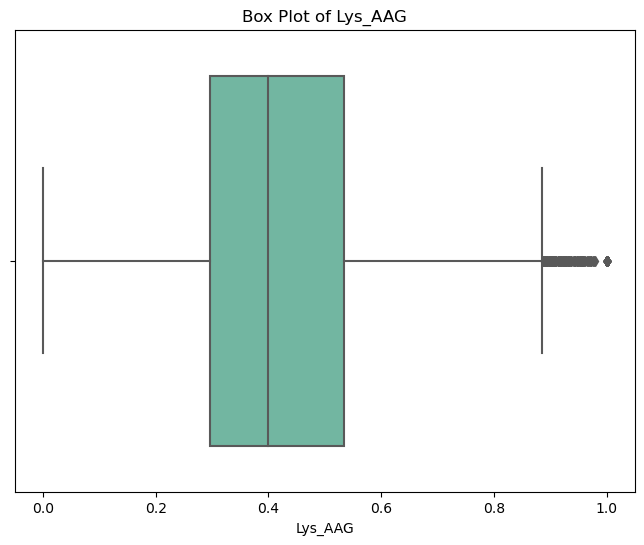

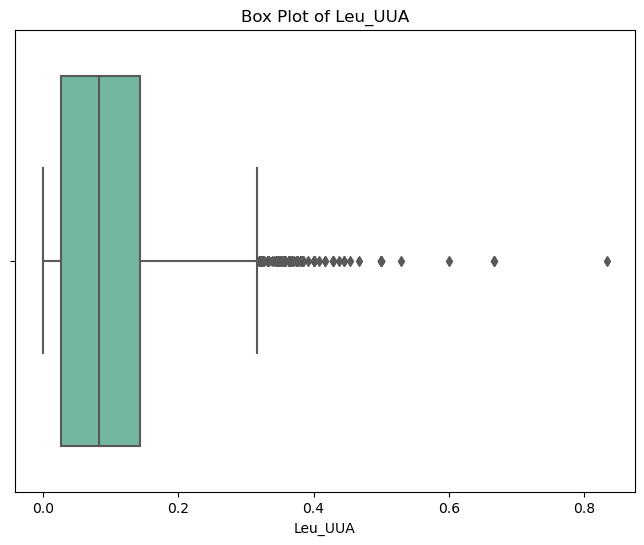

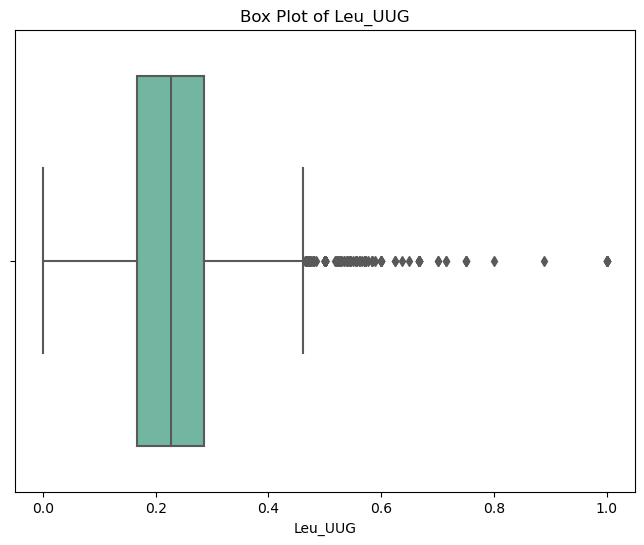

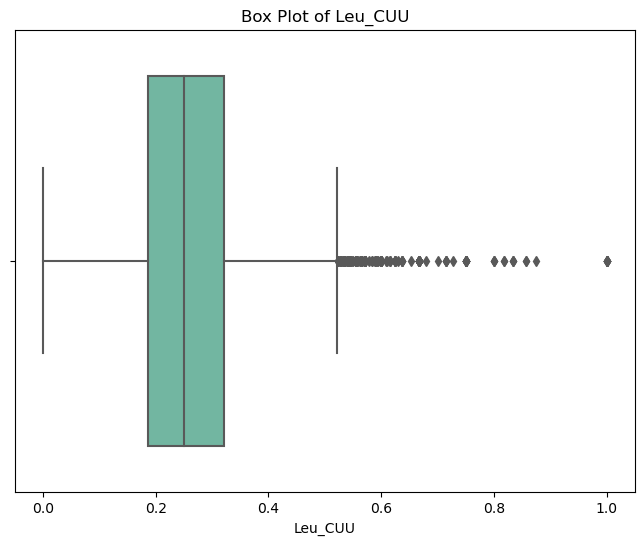

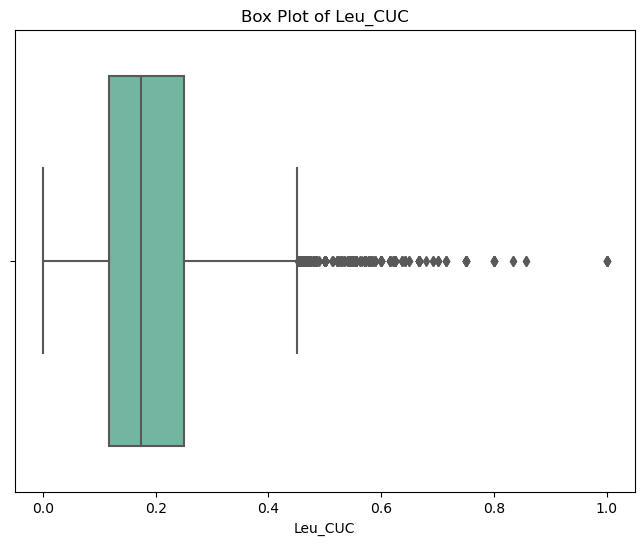

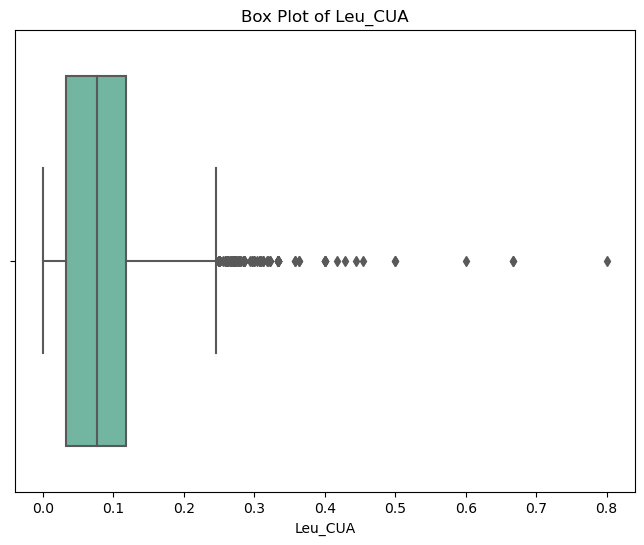

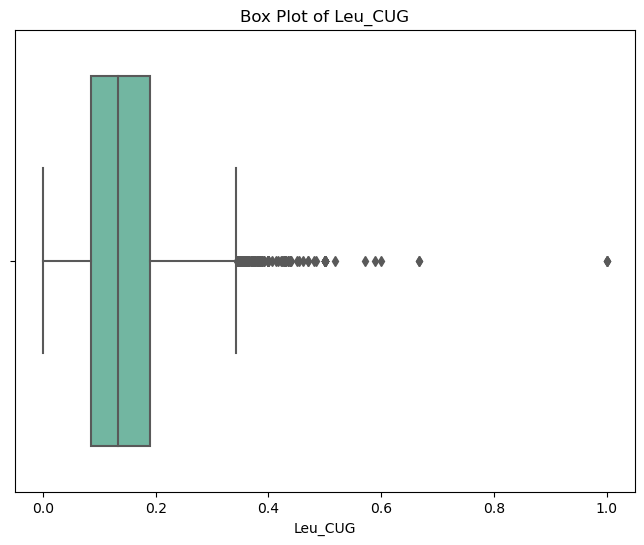

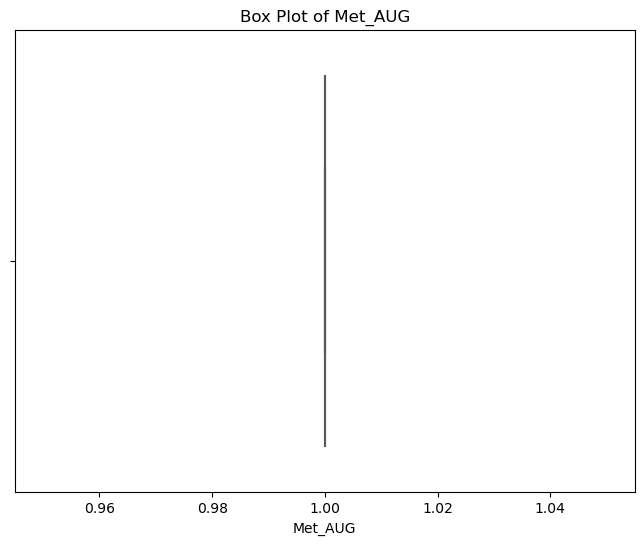

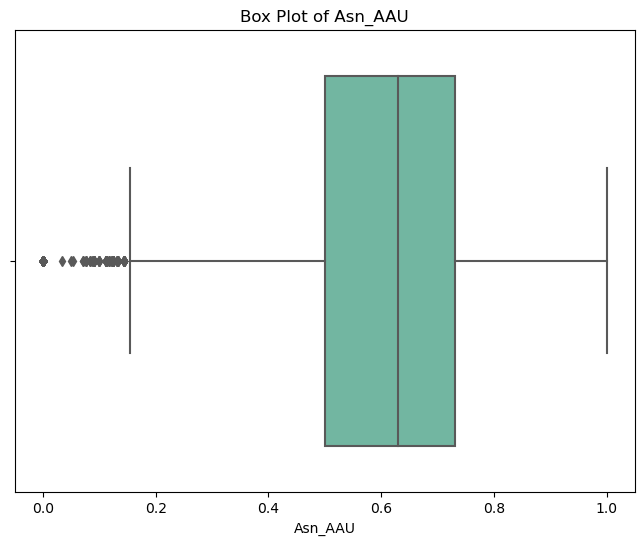

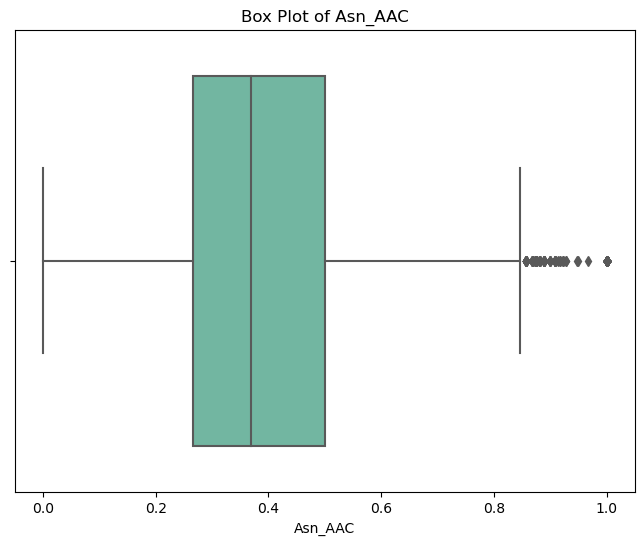

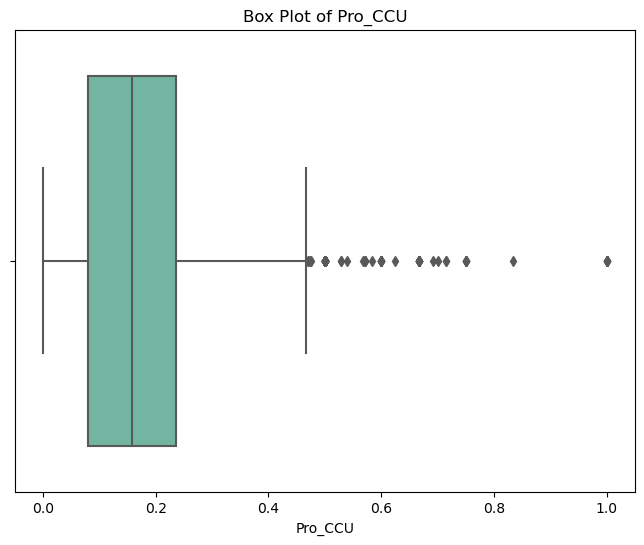

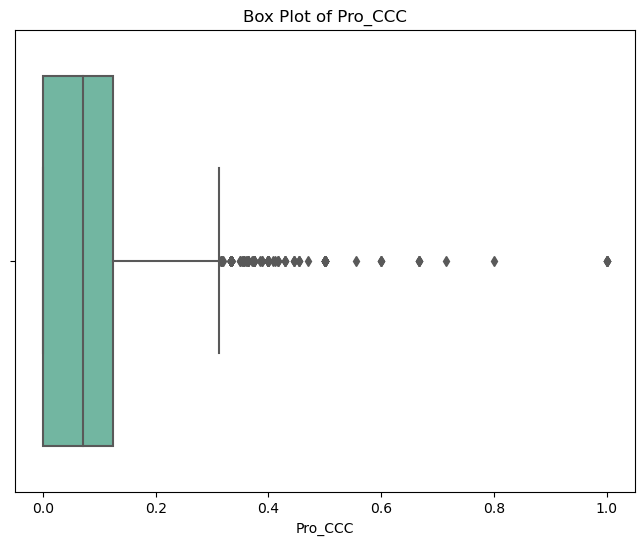

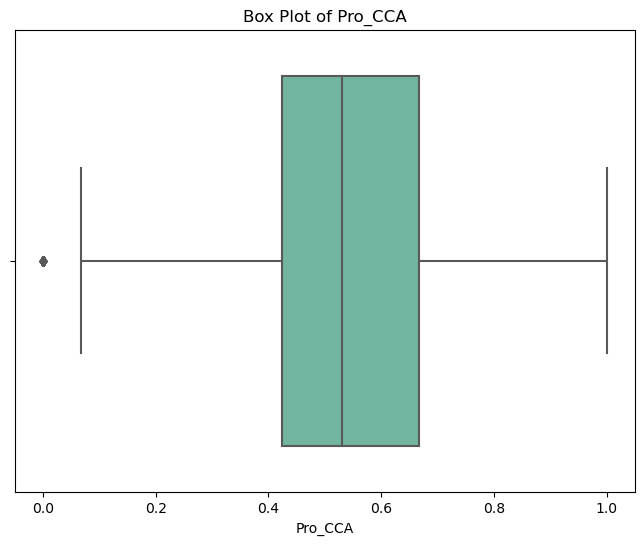

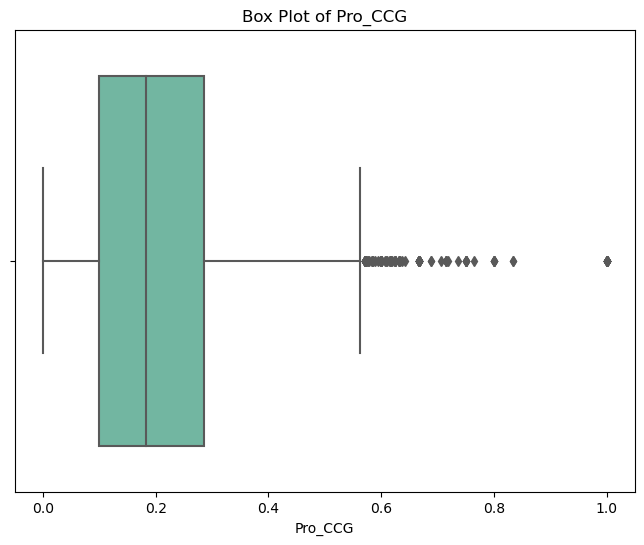

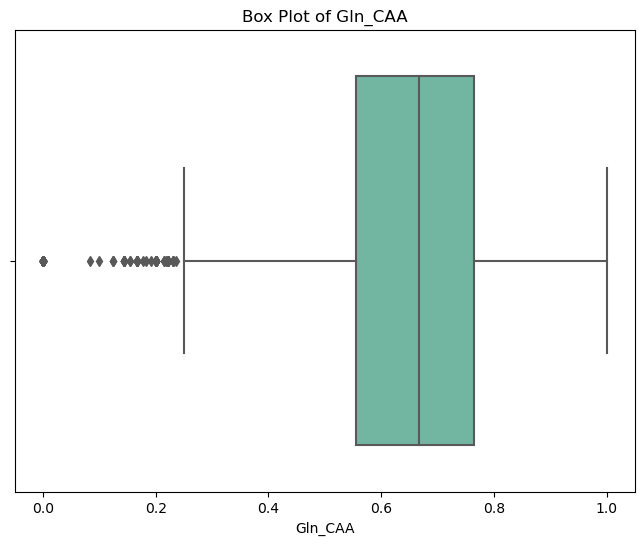

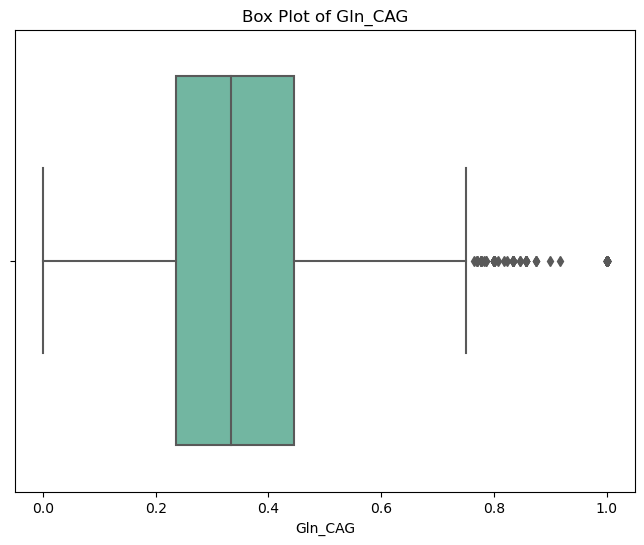

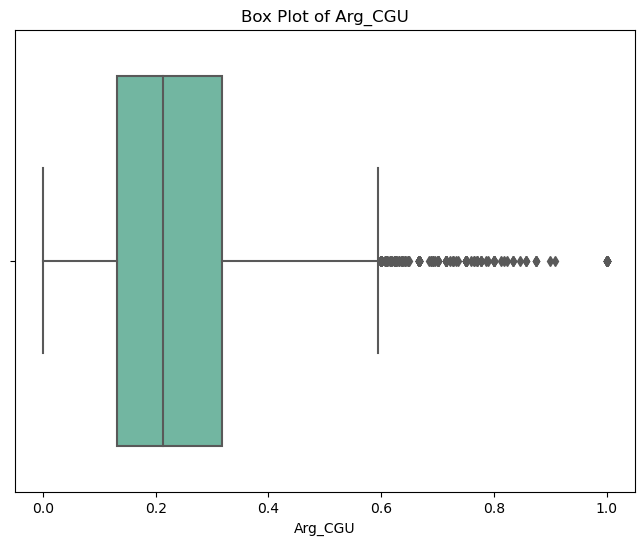

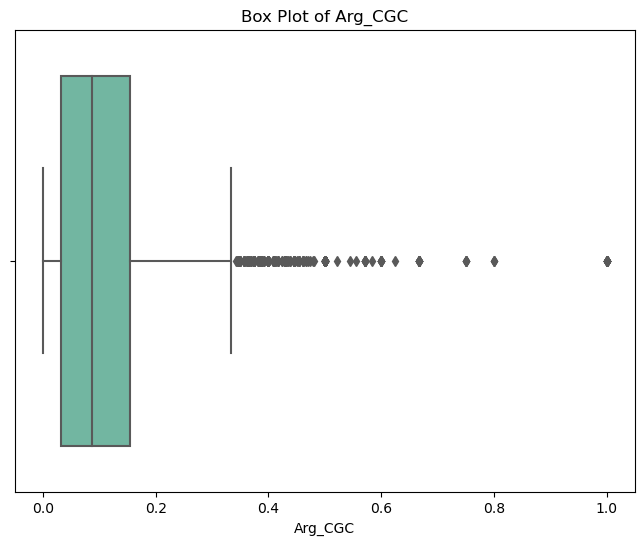

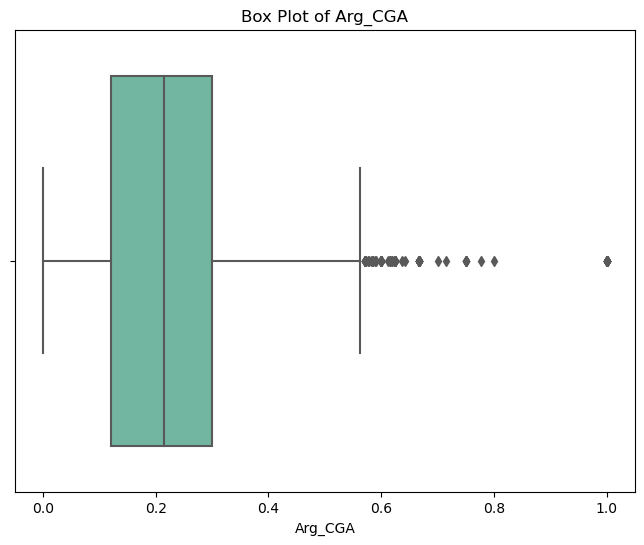

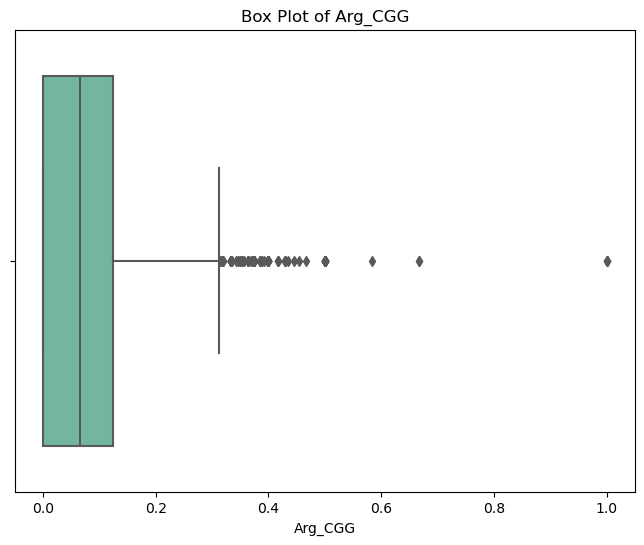

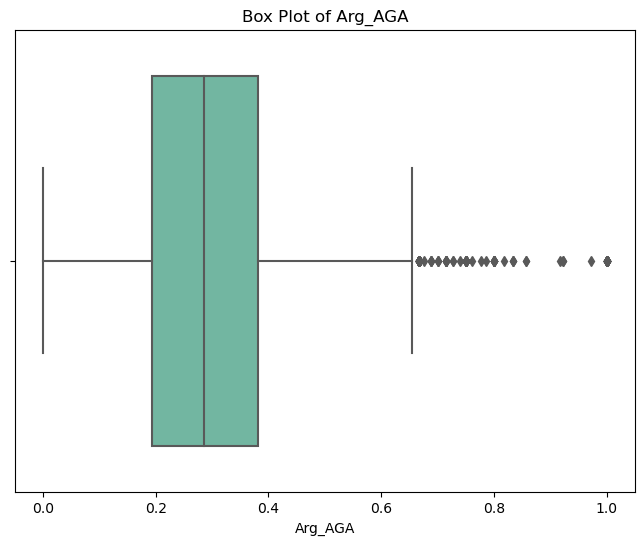

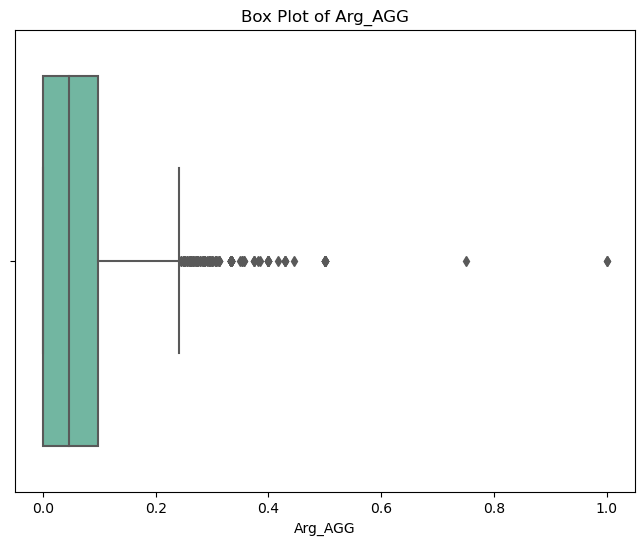

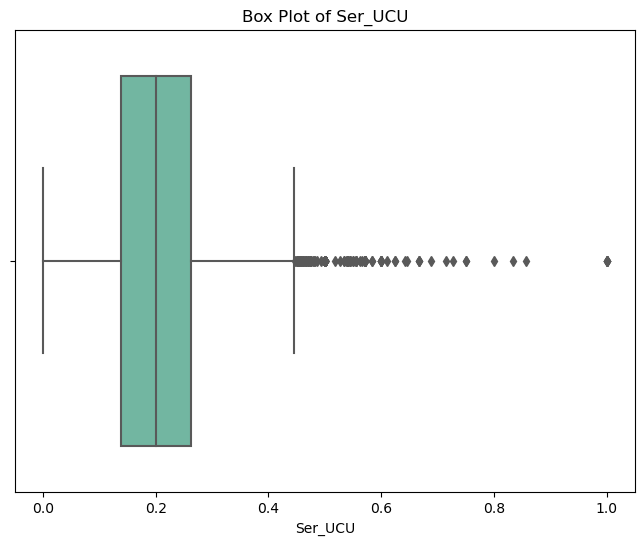

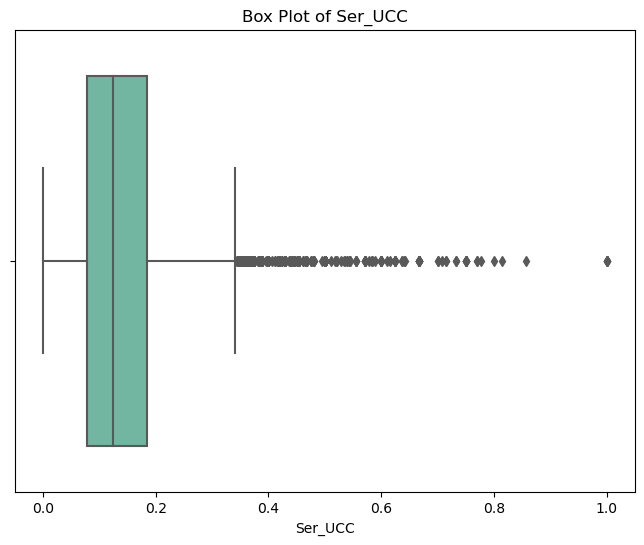

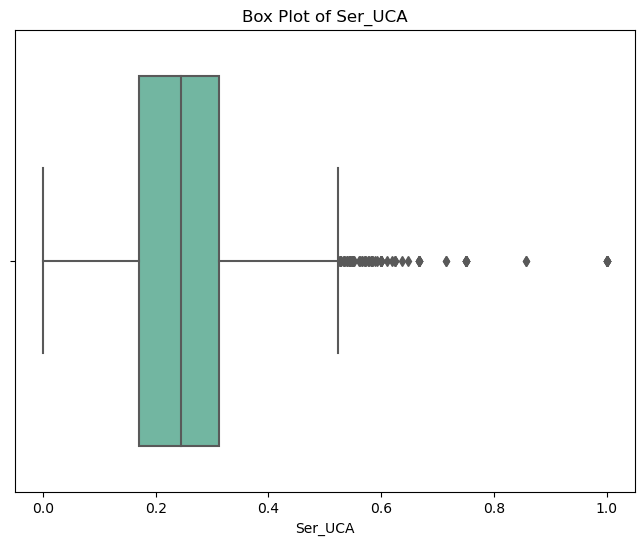

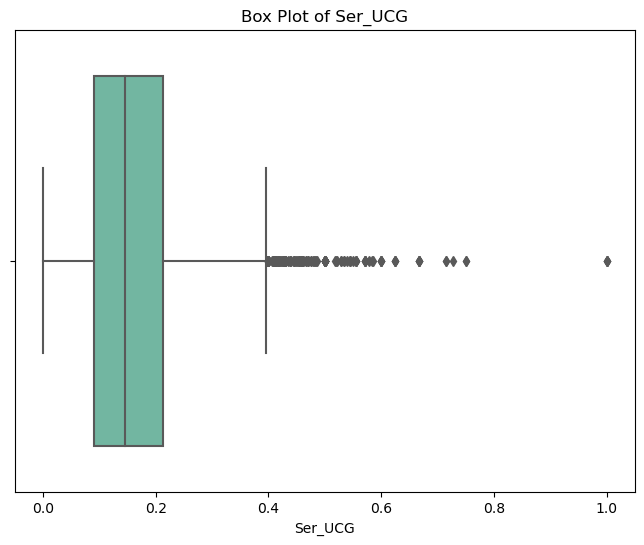

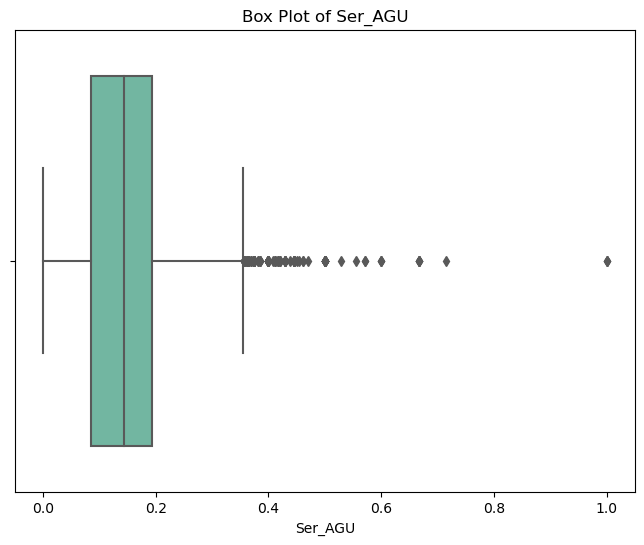

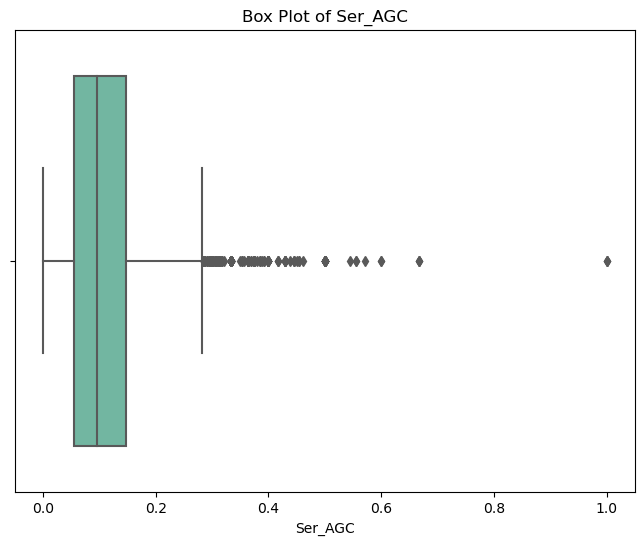

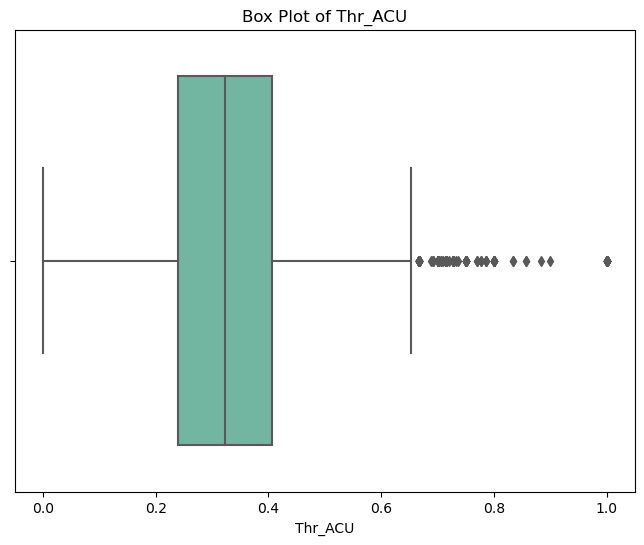

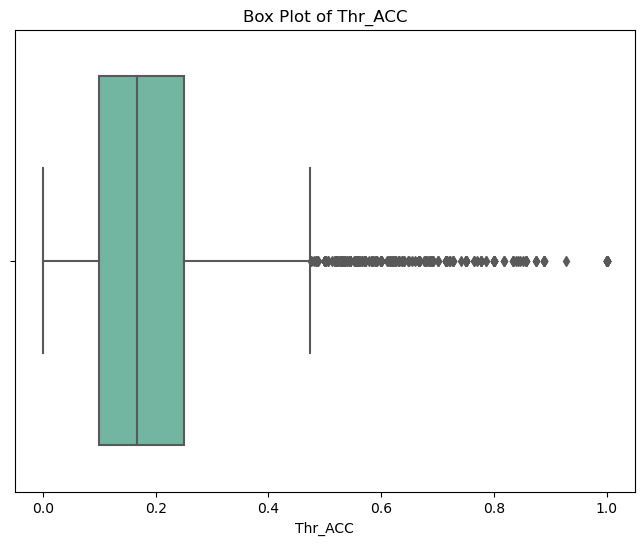

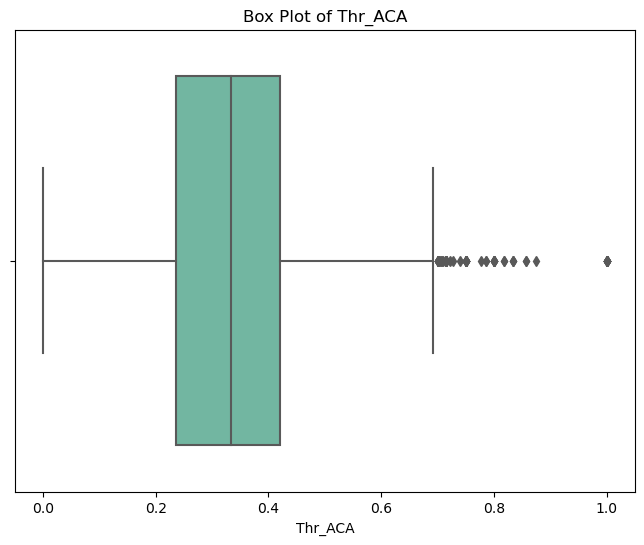

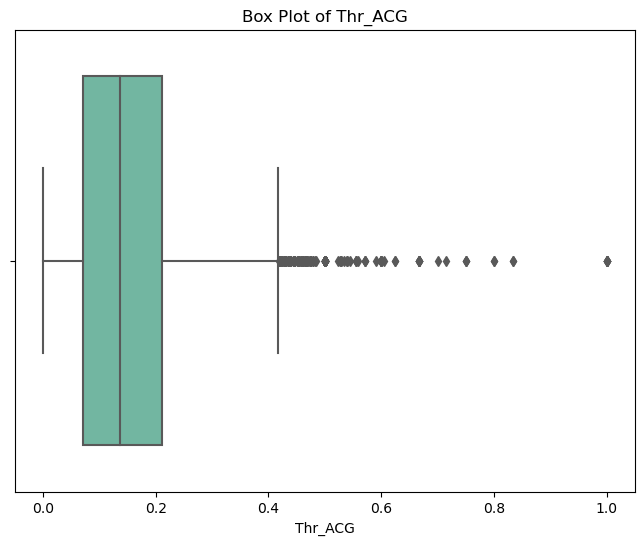

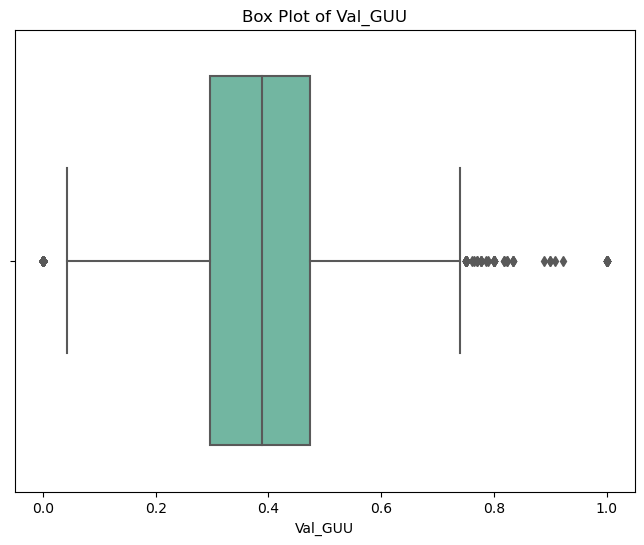

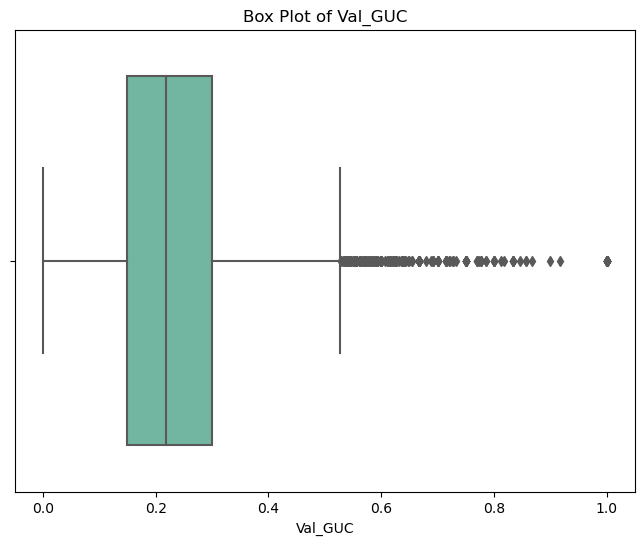

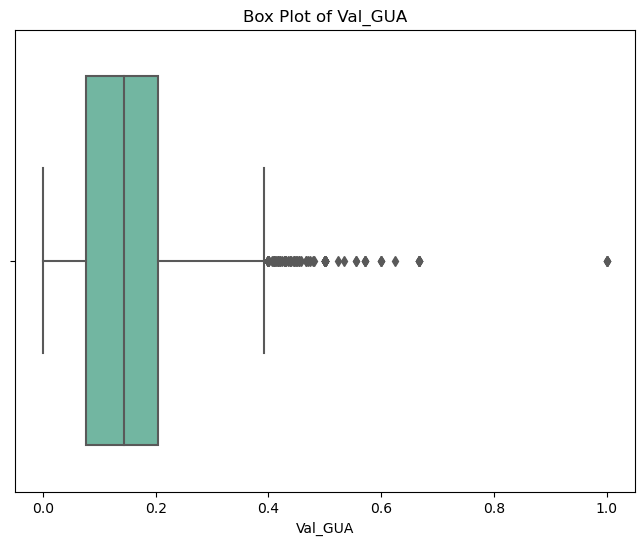

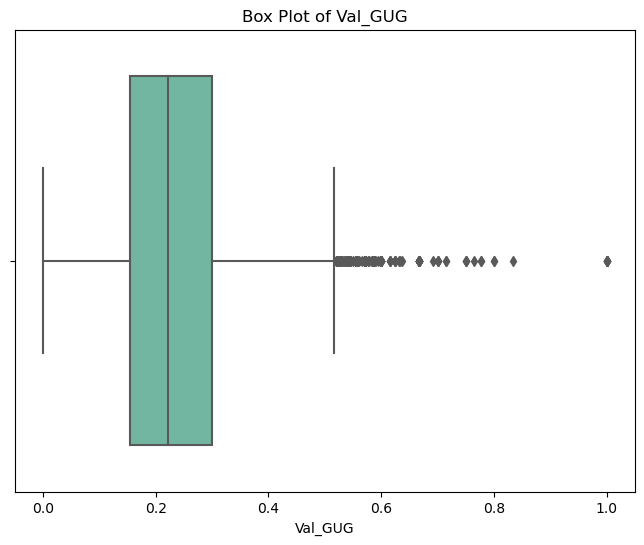

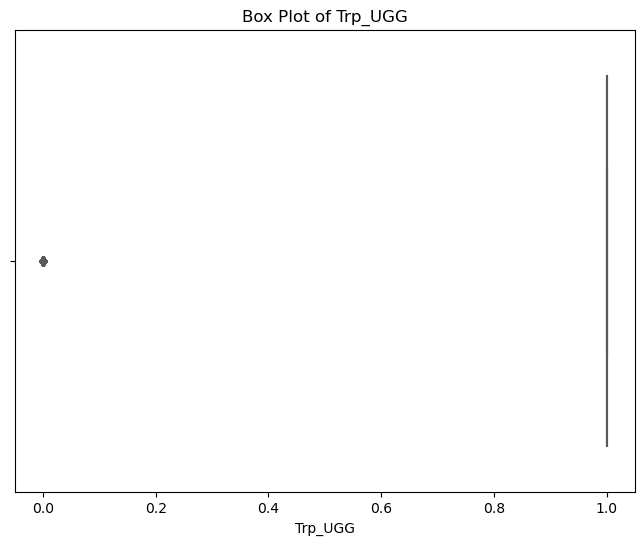

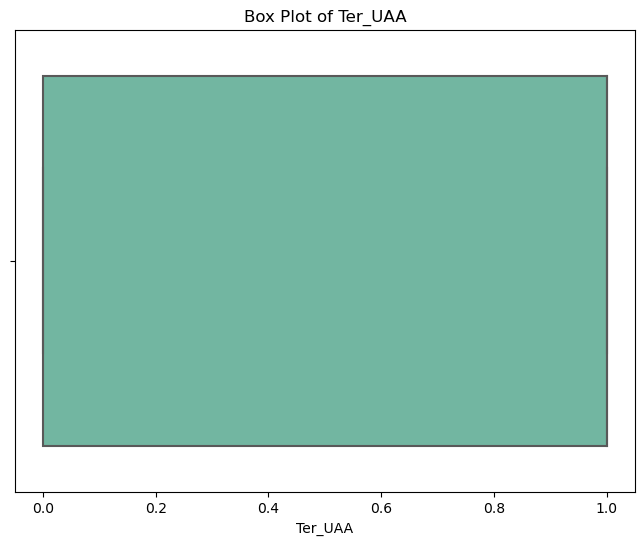

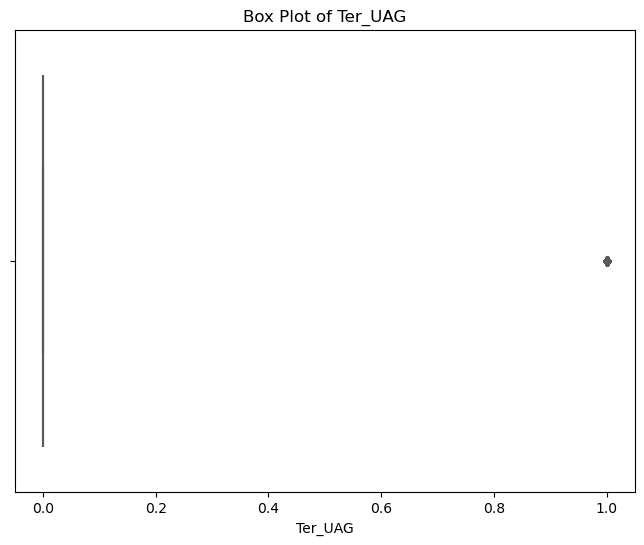

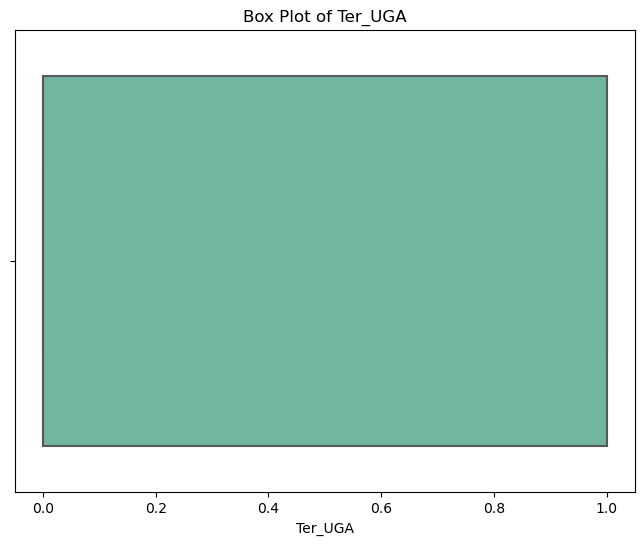

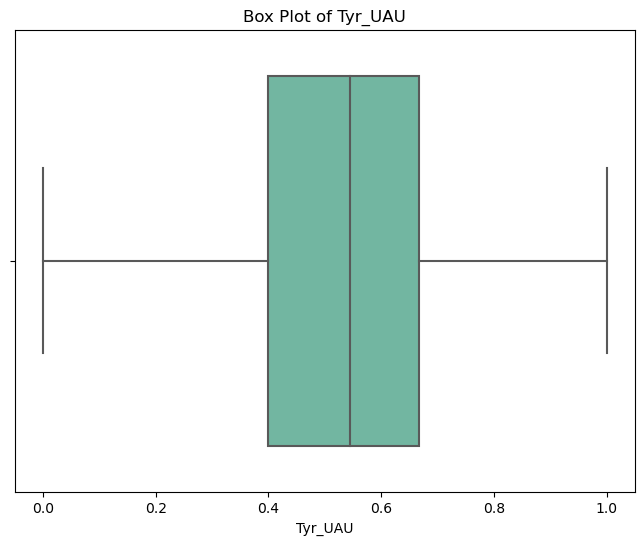

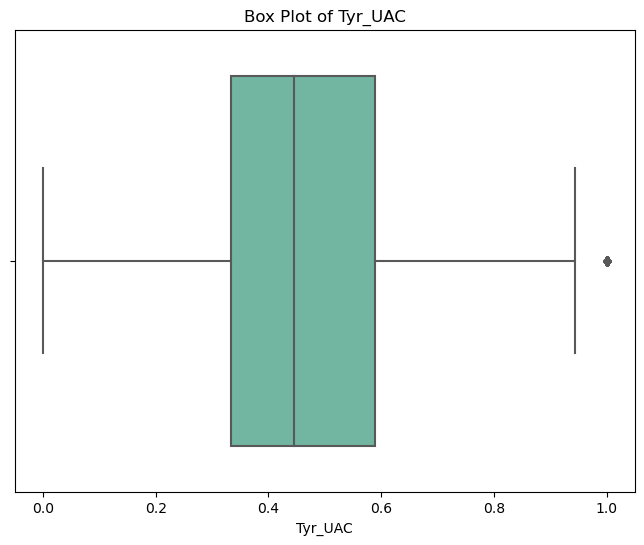

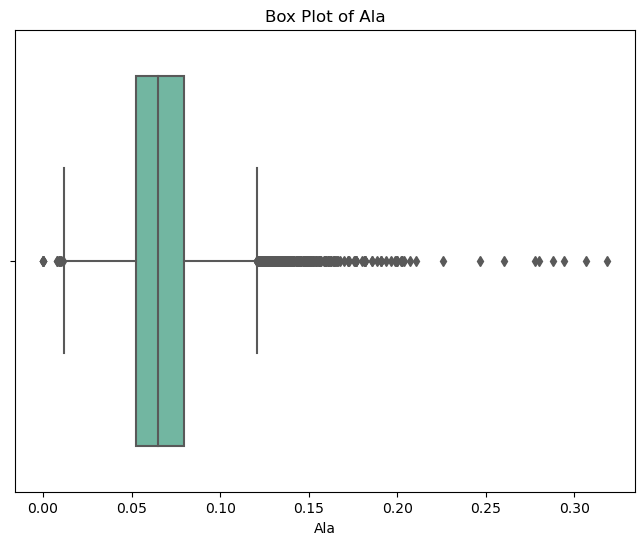

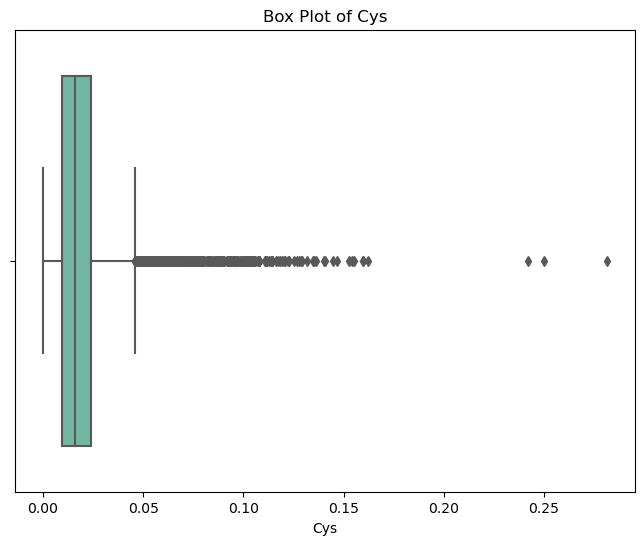

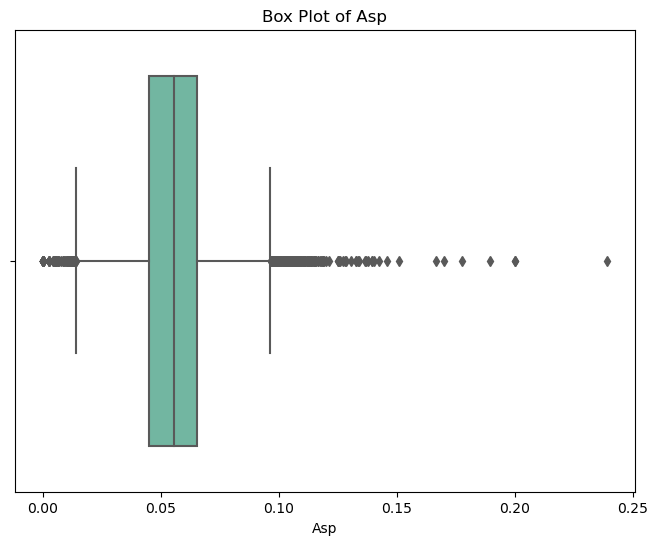

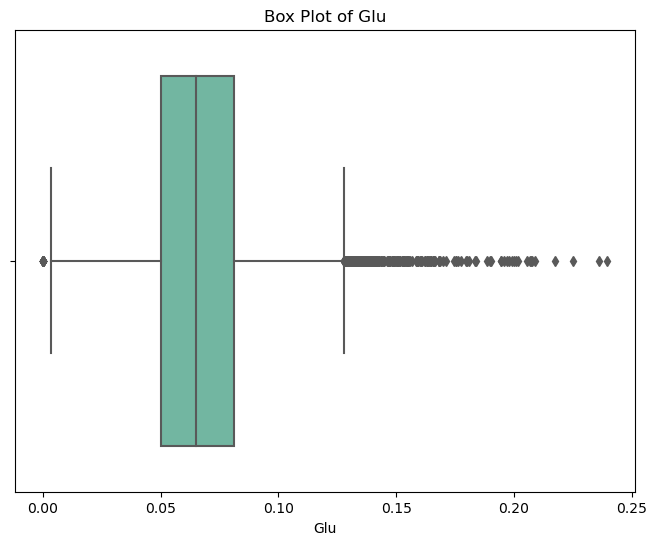

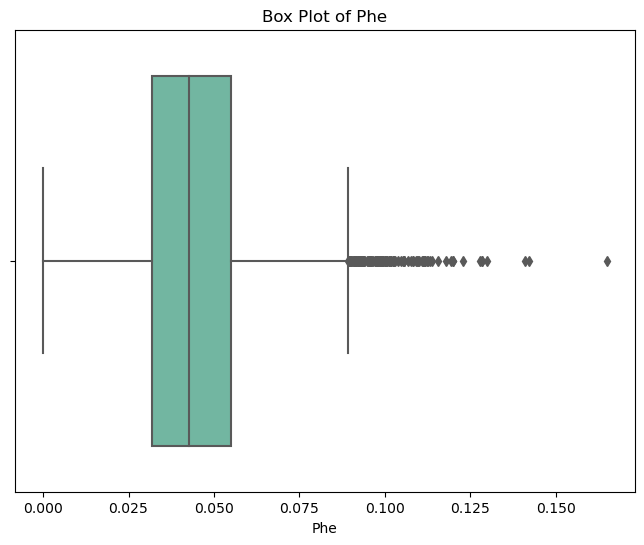

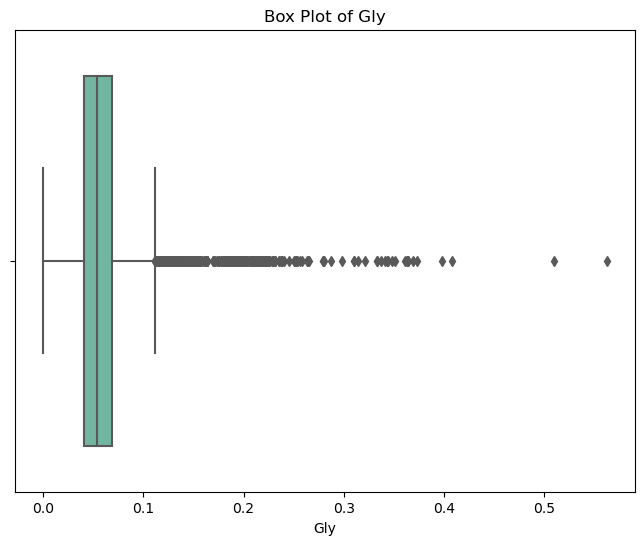

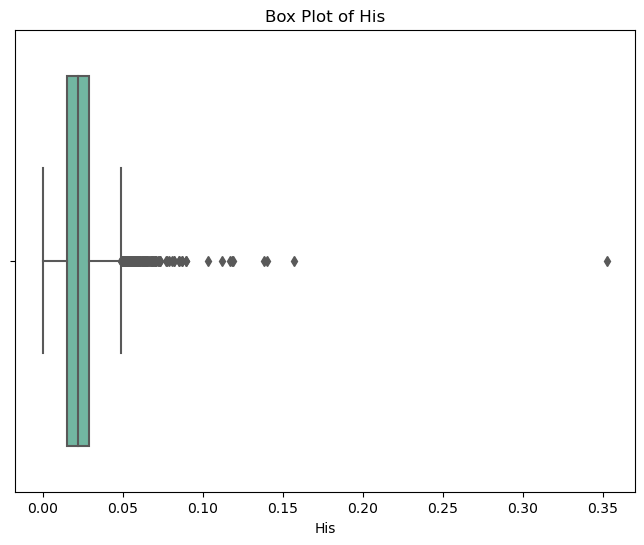

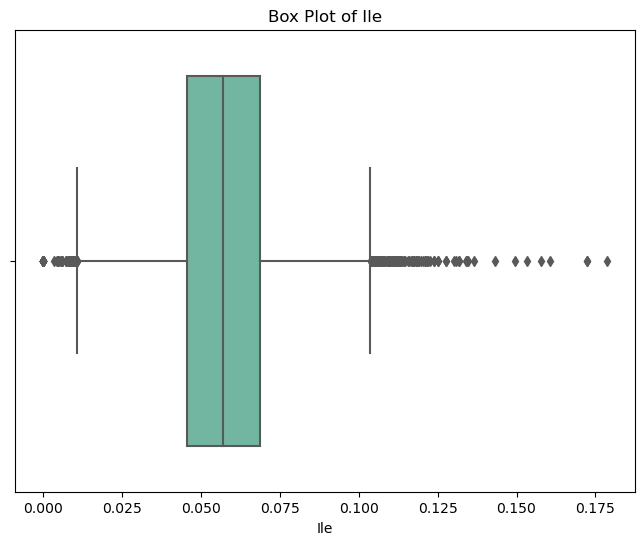

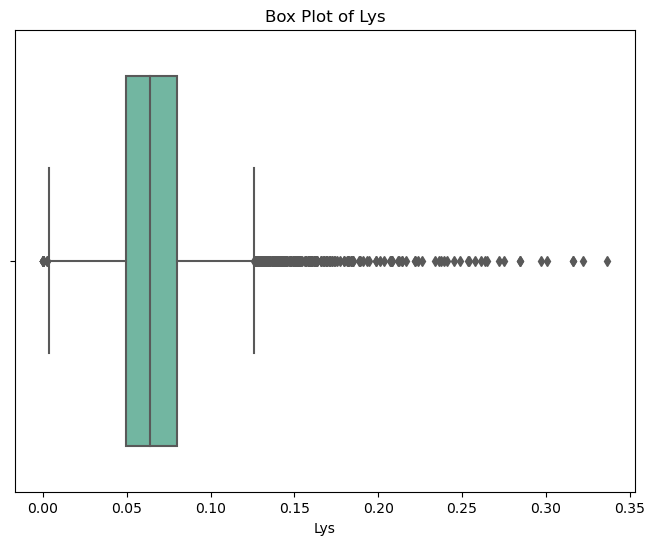

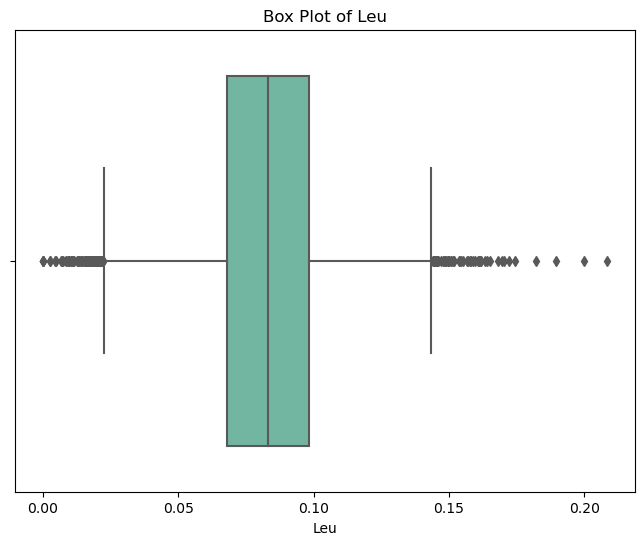

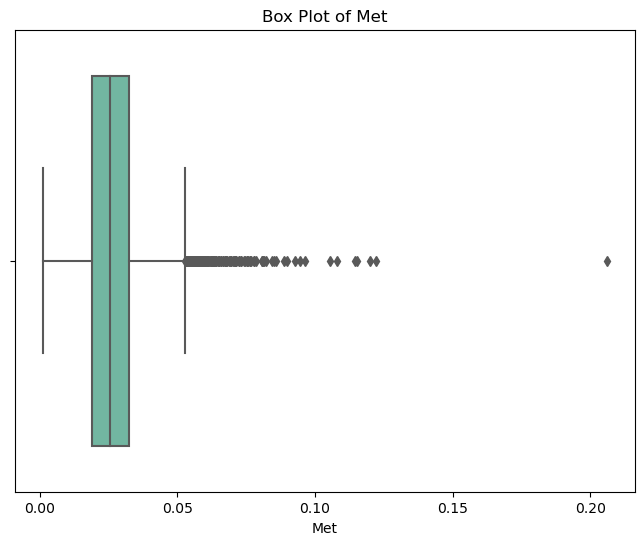

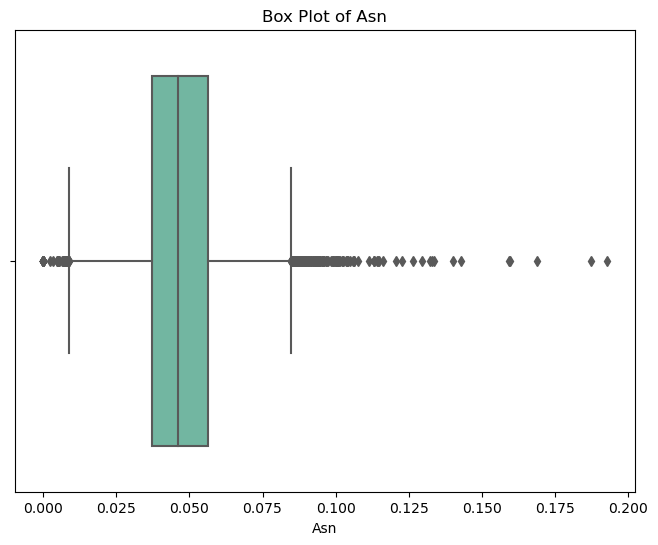

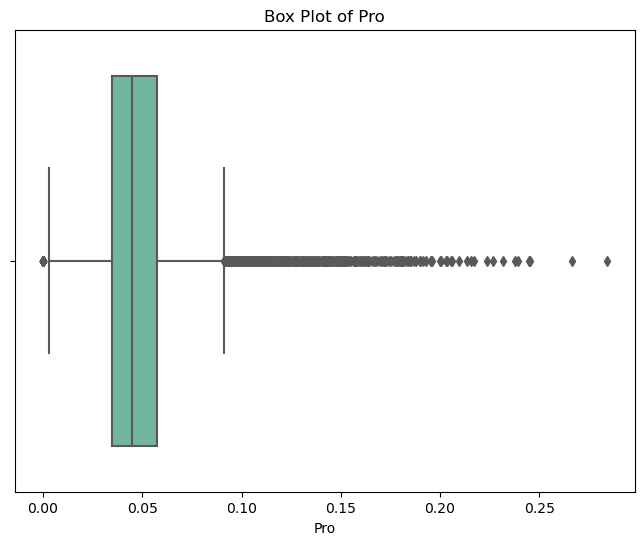

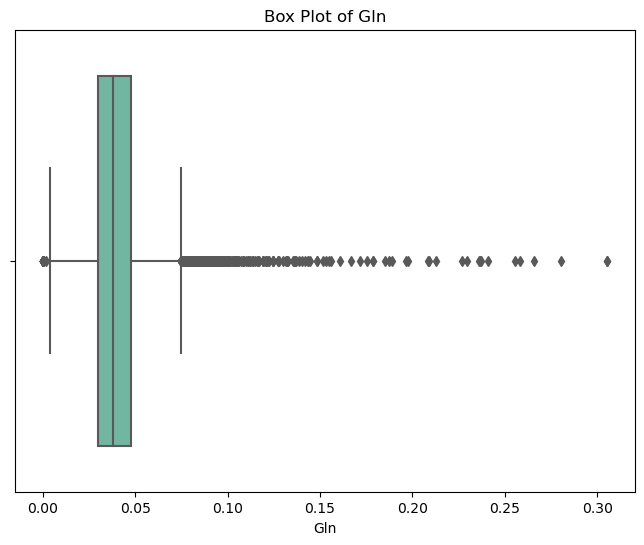

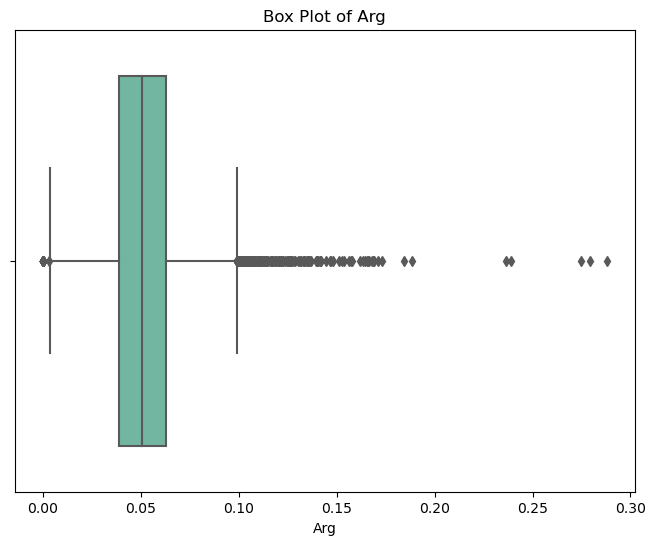

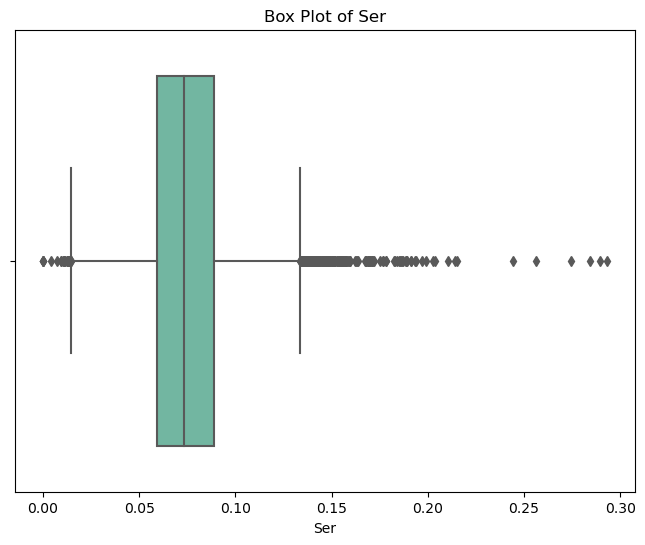

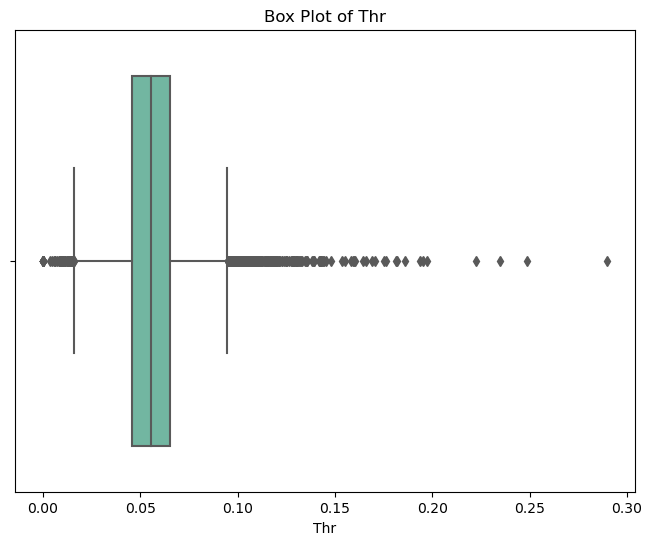

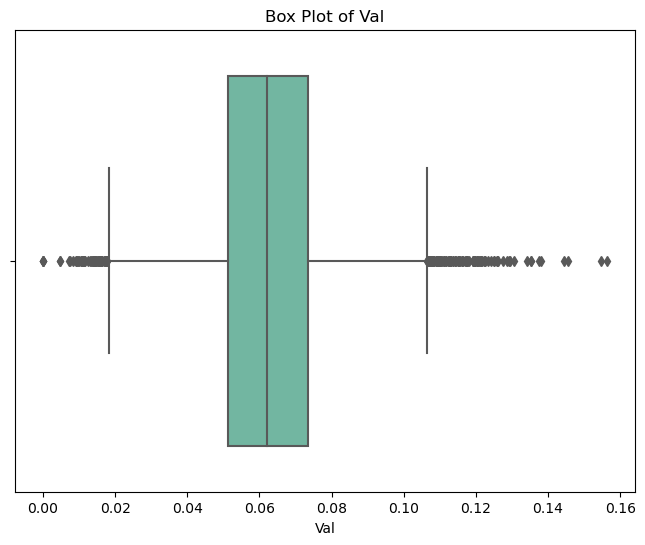

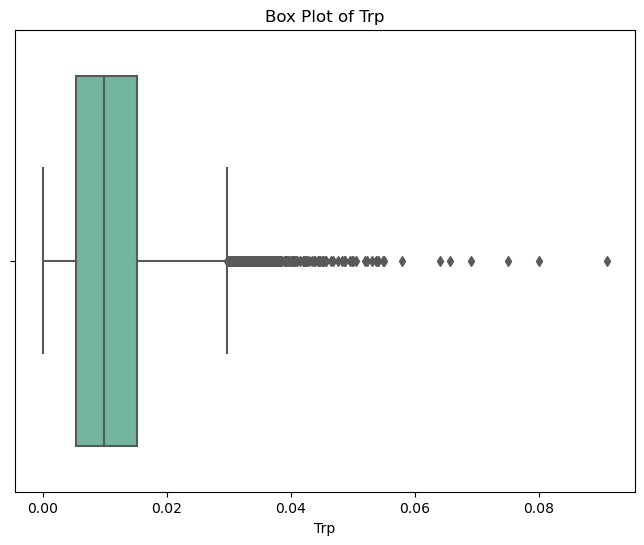

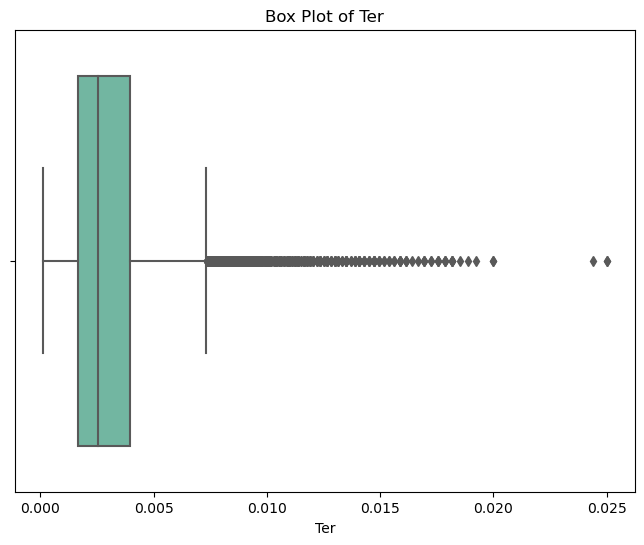

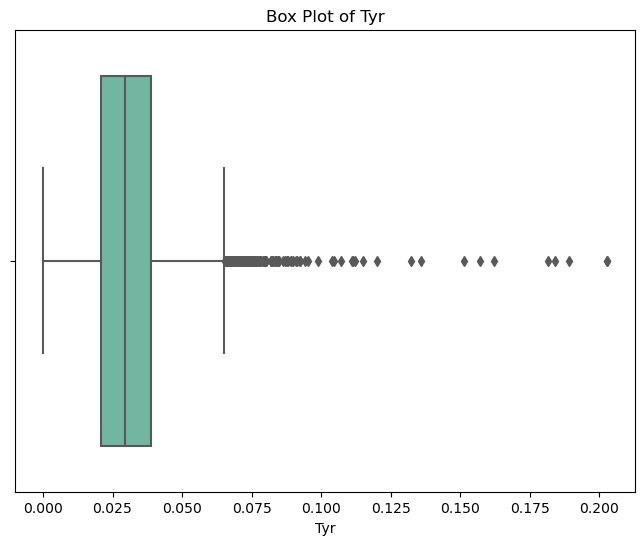

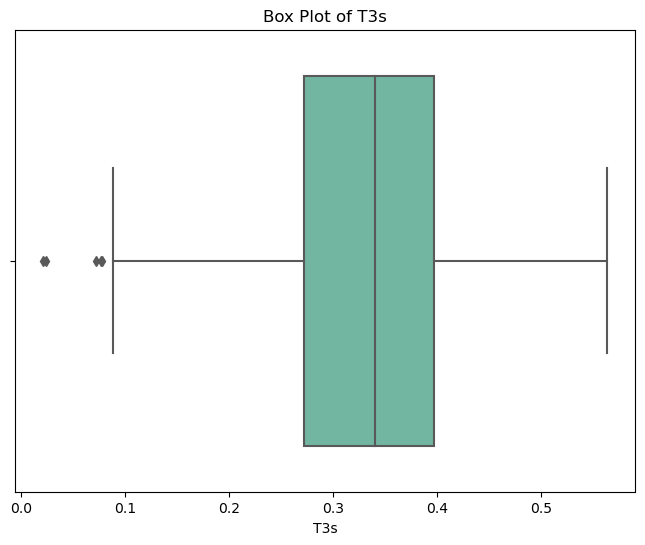

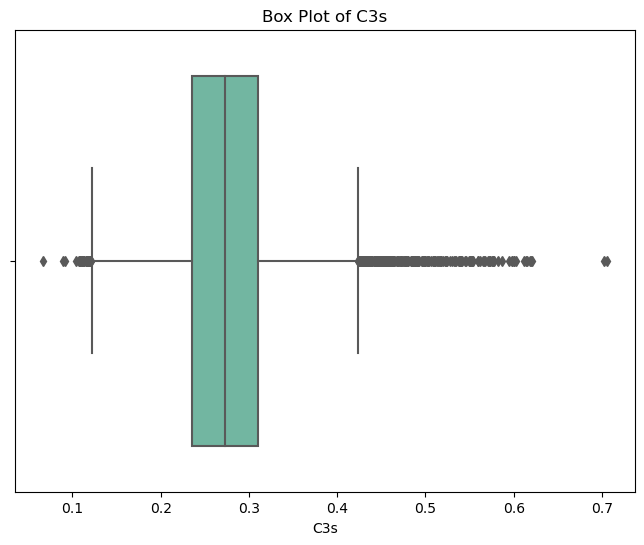

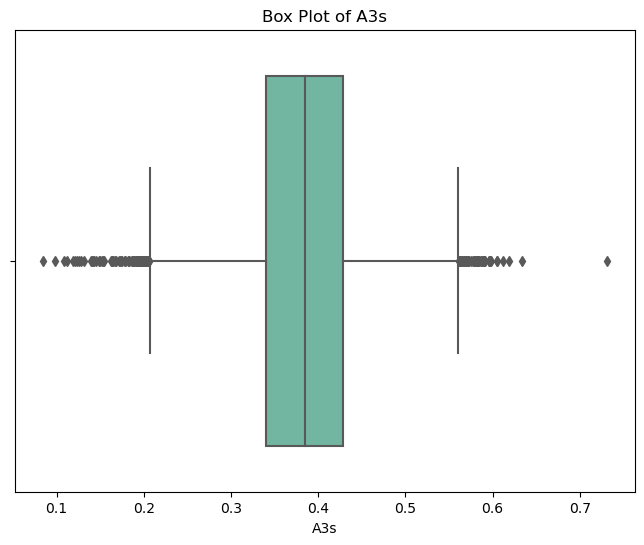

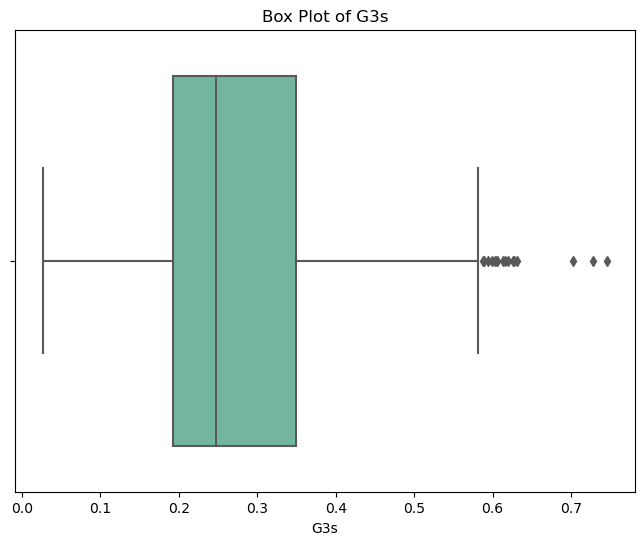

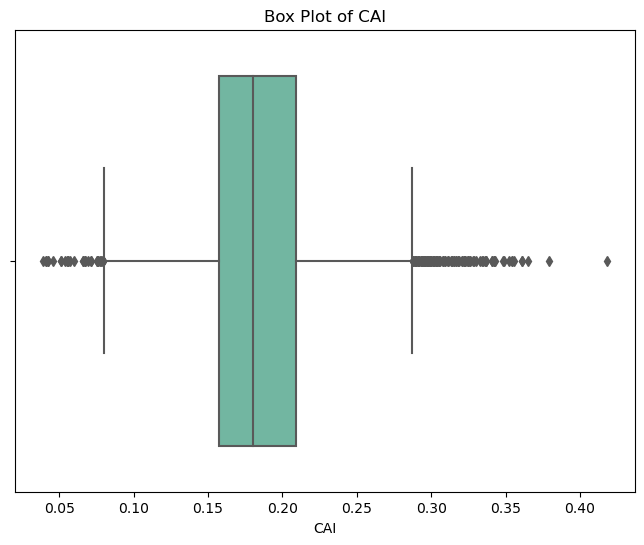

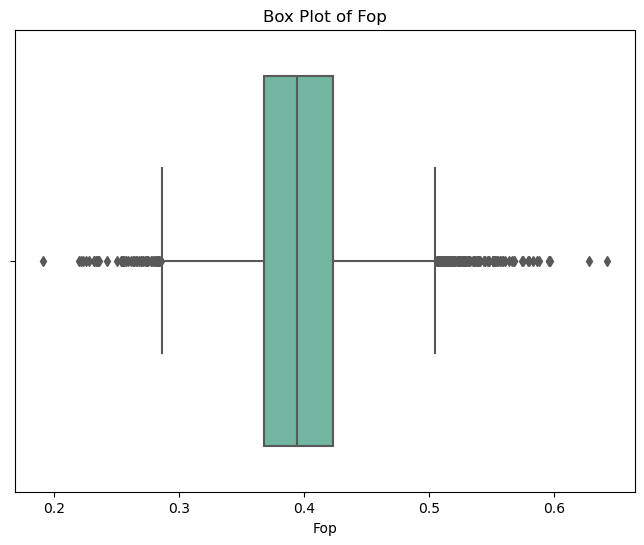

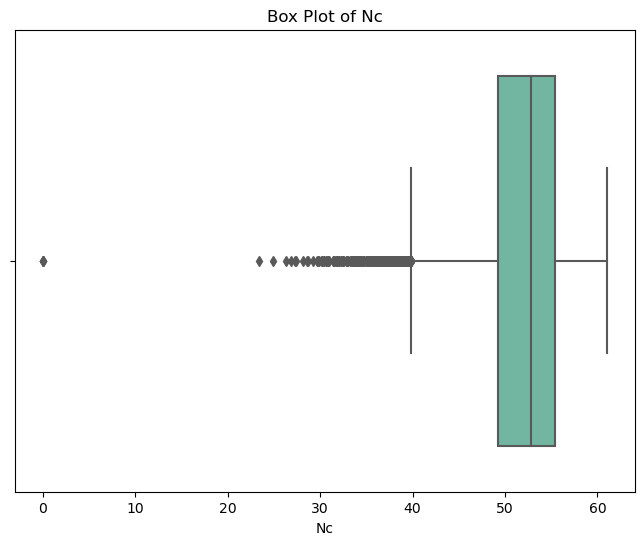

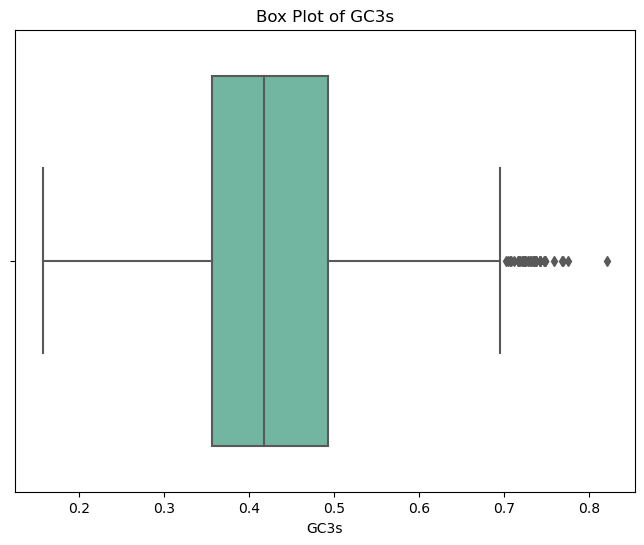

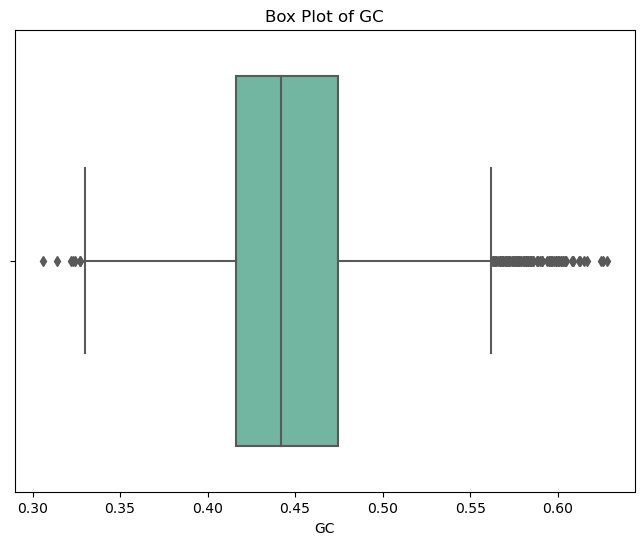

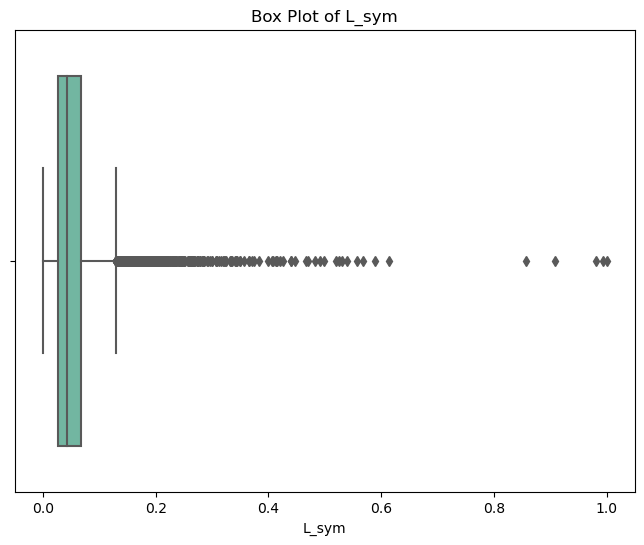

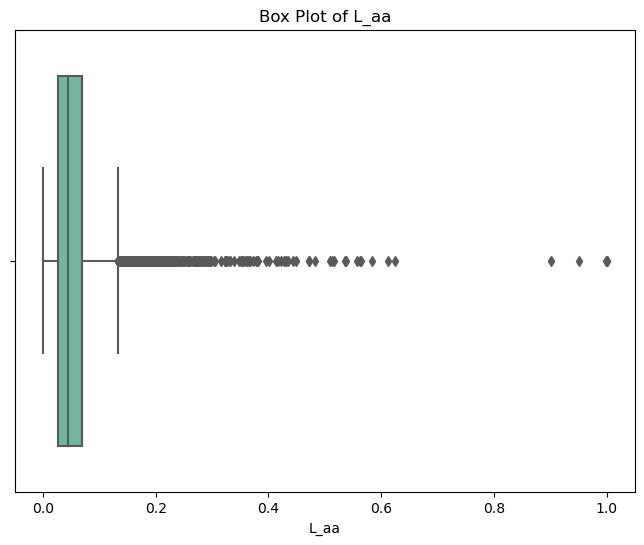

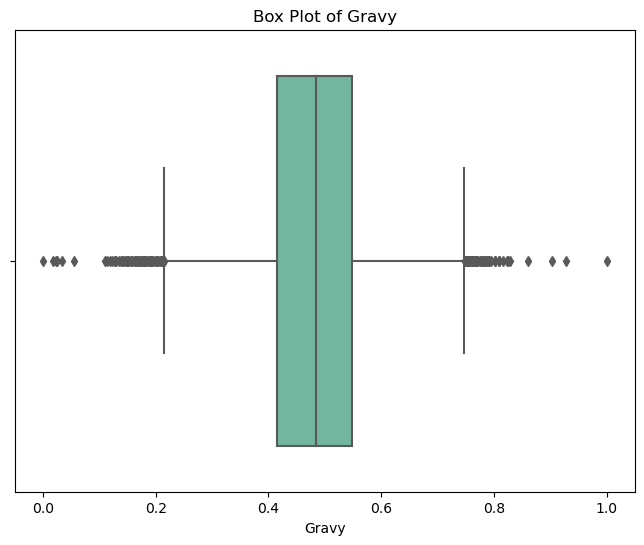

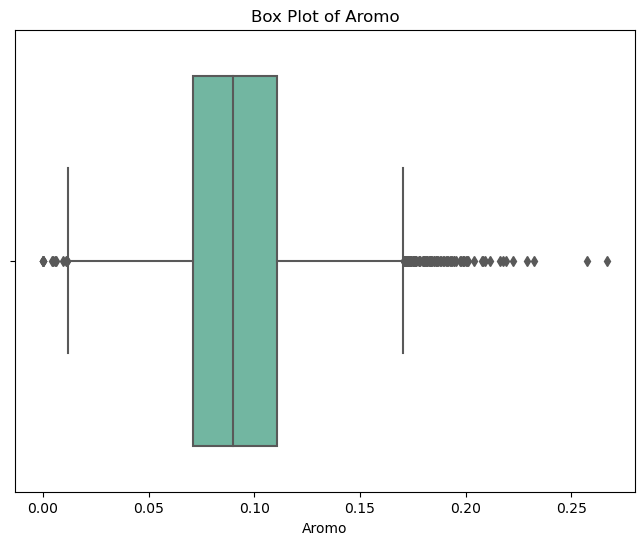

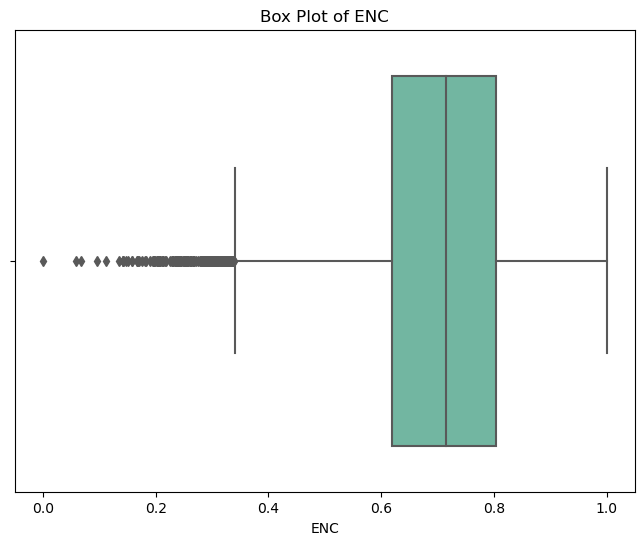

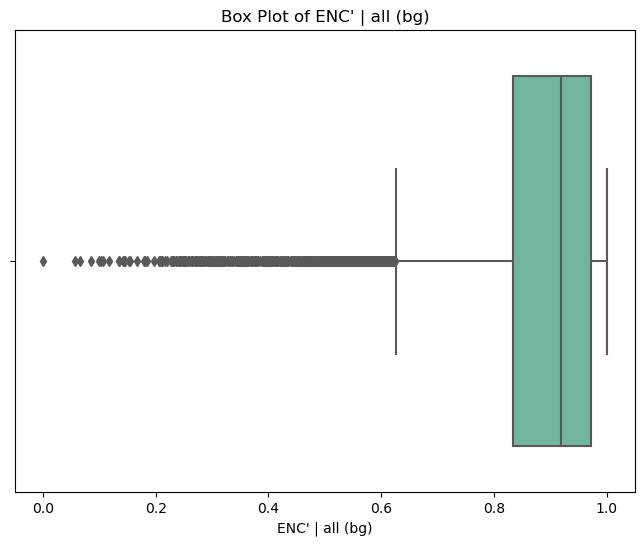

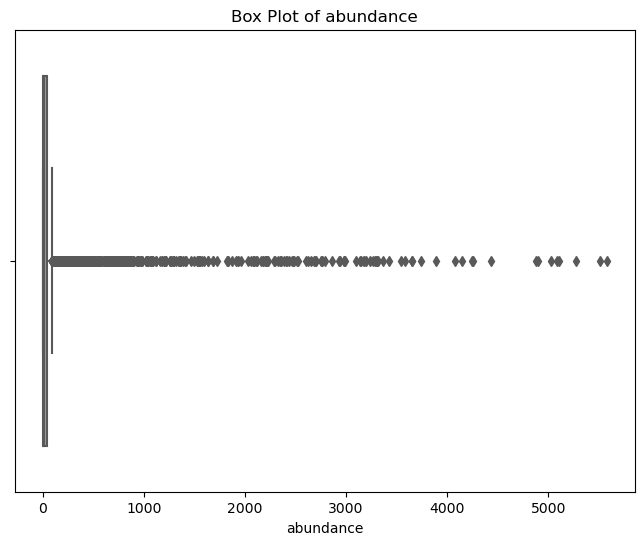

In [22]:
numerical_features = data.select_dtypes(include=[np.number])

# Create box plots for each numerical feature
for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column], orient="h", palette="Set2")
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.show()